### Movie Reviews - Text Analysis

In [1]:
# import required libraries
import pandas as pd
import numpy as np
# text processing
import nltk
# machine learning
import sklearn
# social network analysis
import networkx as net
# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

# You can import other packages if necessary
import warnings

warnings.filterwarnings('ignore')

## Part 1 - Exploring Movie Data

In this part, we will work with the following dataset:
* movies.csv - This dataset contains a sample of movies including movie info, box office gross revenues, as well as audience and critic ratings. The dataset combines data from multiple sources: Rotten Tomatoes, The Numbers, and IMDB. The variable names started with 'rt' indicate the ones collected from the Rotten Tomatoes. For example, the variable 'rtAllCriticsRating' is average movies ratings from the Rotten Tomatoes critics.

In [2]:
# Load the data
movies = pd.read_csv('a3-movies.csv')

In [3]:
movies.columns

Index(['id', 'title', 'imdbID', 'year', 'rtID', 'rtAllCriticsRating',
       'rtAllCriticsNumReviews', 'rtAllCriticsNumFresh',
       'rtAllCriticsNumRotten', 'rtAllCriticsScore', 'rtTopCriticsRating',
       'rtTopCriticsNumReviews', 'rtTopCriticsNumFresh',
       'rtTopCriticsNumRotten', 'rtTopCriticsScore', 'rtAudienceRating',
       'rtAudienceNumRatings', 'rtAudienceScore', 'US Gross',
       'Worldwide Gross', 'US DVD Sales', 'Production Budget', 'MPAA Rating',
       'Running Time (min)', 'Distributor', 'Source', 'Major Genre',
       'Creative Type', 'Director', 'IMDB Rating', 'IMDB Votes'],
      dtype='object')

In [4]:
movies.head()

,id,title,imdbID,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,...,Production Budget,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,IMDB Rating,IMDB Votes
0,1,Toy story,114709,1995,toy_story,9,73,73,0,100,...,30000000.0,G,NaN,Walt Disney Pictures,Original Screenplay,Adventure,Kids Fiction,John Lasseter,8.2,151143.0
1,2,Jumanji,113497,1995,1068044-jumanji,5.6,28,13,15,46,...,65000000.0,PG,NaN,Sony Pictures,Based on Book/Short Story,Adventure,Fantasy,Joe Johnston,6.4,54973.0
2,7,Sabrina,47437,1954,1018047-sabrina,7.4,31,28,3,90,...,58000000.0,PG,NaN,Paramount Pictures,Remake,Romantic Comedy,Contemporary Fiction,Sydney Pollack,6.0,15749.0
3,10,GoldenEye,113189,1995,goldeneye,6.8,41,33,8,80,...,60000000.0,PG-13,NaN,MGM,Based on Book/Short Story,Action,Contemporary Fiction,Martin Campbell,7.2,69199.0
4,11,The American President,112346,1995,american_president,7,49,44,5,89,...,62000000.0,PG-13,NaN,Sony Pictures,Original Screenplay,Romantic Comedy,Contemporary Fiction,Rob Reiner,6.8,22780.0


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 31 columns):
id                        2449 non-null int64
title                     2449 non-null object
imdbID                    2449 non-null int64
year                      2449 non-null int64
rtID                      2415 non-null object
rtAllCriticsRating        2449 non-null object
rtAllCriticsNumReviews    2449 non-null object
rtAllCriticsNumFresh      2449 non-null object
rtAllCriticsNumRotten     2449 non-null object
rtAllCriticsScore         2449 non-null object
rtTopCriticsRating        2449 non-null object
rtTopCriticsNumReviews    2449 non-null object
rtTopCriticsNumFresh      2449 non-null object
rtTopCriticsNumRotten     2449 non-null object
rtTopCriticsScore         2449 non-null object
rtAudienceRating          2449 non-null object
rtAudienceNumRatings      2449 non-null object
rtAudienceScore           2449 non-null object
US Gross                  2449 non-null object
Wor

### 1.1. Box Office Success

One of the overarching question would be: **what factors are associated with the box office success of movies?**

Step 1. EDA plan:<br>

**1. What does the dataset look like?**<br>
The data-set has around 2449 unique movie reviews with information combined from rottentomatoes, IMDB and The Numbers. From rotten tomatoes website, we have ratings, number of fresh, number of rotten and the score from all the critics, top crtiics and also audience rating, score and number of ratings. We have US Gross, Worldwide Gross, US DVD Sales and Production Budget as some of the numeric variables and also MPAA Rating, IMDB Rating and Votes as some of more qualitative variables. Assitionally, Running time, Distributor, Source, Major Genre, Creative Type, Director,id, title, year as some of the dimensions.

**2. What variables are you going to examine, and how?** <br>
To explore the factors associated with box office success of movies, we could examine some of the numbers associated with a  movie in this dataset such as US Gross, Worldwide Gross and Production Budget. We can calculate the Box Office Revenue using the following formula:
Box office Revenue = (Worldwide Gross + US Gross) - Production Budget

Additionally, we can also examine how all critics, top critics or audience rating can affect these numbers and additionally, we can also check if other dimensions such as running time, genre, director, source etc. has any impact on these numbers.

**The approach, I would like to take to analyze above mentioned variables would be as follows:**<br>
* Visualize how the numbers (US Gross, Worldwide Gross, Product Budget and Box Office Revenue) vary accross different movies.
* Check if there is any correlation between ratings, scores by critics or audience on these numbers using correlation matrix.
* Additionally, through visualizations, I would like to analyze if dimensions such as director, source or genre could have impact on these numbers.

**3. What hypothese do you have?**<br>
I have following hypotheses with respect to evaluating box office success for a movie:
* Higher US Gross, Worldwide Gross and Production Budget would lead to a higher box office success. Consequently, we would have higher rating, scores for these box office successful movies.

**4. Are there any concerns or limitations of your analysis?**<br>
With no strict definitions of the gross and budget numbers provided, there could be other factors that could affect box office revenue such as taxes, special fees etc. hence, the associations that we see may slightly vary from the true associations if these number were to change slightly.

### Clean the Data

This is the most important step in any EDA process. We need to look at the all the relevant variables in our dataset and see if we need to perform any sort of cleaning or transformation for missing values or incorrect values (outliers etc.). Do perform cleaning let's look the columns first to understand what we do have.

In [7]:
# Exploring the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 31 columns):
id                        2449 non-null int64
title                     2449 non-null object
imdbID                    2449 non-null int64
year                      2449 non-null int64
rtID                      2415 non-null object
rtAllCriticsRating        2449 non-null object
rtAllCriticsNumReviews    2449 non-null object
rtAllCriticsNumFresh      2449 non-null object
rtAllCriticsNumRotten     2449 non-null object
rtAllCriticsScore         2449 non-null object
rtTopCriticsRating        2449 non-null object
rtTopCriticsNumReviews    2449 non-null object
rtTopCriticsNumFresh      2449 non-null object
rtTopCriticsNumRotten     2449 non-null object
rtTopCriticsScore         2449 non-null object
rtAudienceRating          2449 non-null object
rtAudienceNumRatings      2449 non-null object
rtAudienceScore           2449 non-null object
US Gross                  2449 non-null object
Wor

We see that the variables of interest such US Gross and Worldwide Gross are not float time objects. We need to convert them into float so that we can evaluate Box office revenue correction. We calculate the Box Office Revenue using the following formula: Box office Revenue = (Worldwide Gross + US Gross) - Production Budget.

We also see some unknown values in the Worldwide Gross and US Gross columns. Let's remove those rows as we won't be able to calculate Box Office Revenue for these movies.

In [8]:
# Cleaning the US Gross and Worldwide Gross columns
# Remove unknown value rows
movies_sub = movies[(movies['US Gross'] != 'Unknown') & (movies['Worldwide Gross'] != 'Unknown')]

# Convert to float type
movies_sub['US Gross'] = movies_sub['US Gross'].astype(str).astype(float)
movies_sub['Worldwide Gross'] = movies_sub['Worldwide Gross'].astype(str).astype(float)

# Calculate the Box Office Revenue
movies_sub['Box Office Revenue'] = movies_sub['US Gross'] + movies_sub['Worldwide Gross'] - movies_sub['Production Budget']

# Check the new Box office Revenue column created
movies_sub[['title','US Gross','Worldwide Gross','Production Budget','Box Office Revenue']].head()

,title,US Gross,Worldwide Gross,Production Budget,Box Office Revenue
0,Toy story,191796233.0,361948825.0,30000000.0,523745058.0
1,Jumanji,100458310.0,262758310.0,65000000.0,298216620.0
2,Sabrina,53458319.0,87100000.0,58000000.0,82558319.0
3,GoldenEye,106429941.0,356429941.0,60000000.0,402859882.0
4,The American President,60022813.0,107822813.0,62000000.0,105845626.0


In [9]:
# Fill -1 to all the rows where we see NA values
movies_sub = movies_sub.fillna(-1)

# Clean the rotten tomatoes rating, scores columns with '\\N' values
movies_sub.loc[movies_sub['rtAllCriticsRating'] == '\\N',['rtAllCriticsRating',
                                                      'rtAllCriticsRating',
                                                      'rtAllCriticsNumReviews',
                                                      'rtAllCriticsNumFresh',
                                                      'rtAllCriticsNumRotten', 
                                                      'rtAllCriticsScore',    
                                                      'rtTopCriticsRating', 
                                                      'rtTopCriticsNumReviews', 
                                                      'rtTopCriticsNumFresh',
                                                      'rtTopCriticsNumRotten',
                                                      'rtTopCriticsScore',
                                                      'rtAudienceRating',
                                                      'rtAudienceNumRatings',
                                                      'rtAudienceScore']] = -1

# Convert text value columns to numeric (except for id, title,year, rtID and imdbiD)
movies_sub['MPAA Rating'] = movies_sub['MPAA Rating'].astype('category')
movies_sub['Major Genre'] = movies_sub['Major Genre'].astype('category')
movies_sub['Director'] = movies_sub['Director'].astype('category')
movies_sub['Creative Type'] = movies_sub['Creative Type'].astype('category')
movies_sub['Distributor'] = movies_sub['Distributor'].astype('category')
movies_sub['Source'] = movies_sub['Source'].astype('category')

cat_columns = movies_sub.select_dtypes(['category']).columns
movies_sub[cat_columns] = movies_sub[cat_columns].apply(lambda x: x.cat.codes)
movies_sub.head()

,id,title,imdbID,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,...,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,IMDB Rating,IMDB Votes,Box Office Revenue
0,1,Toy story,114709,1995,toy_story,9,73,73,0,100,...,1,-1.0,92,13,2,6,224,8.2,151143.0,523745058.0
1,2,Jumanji,113497,1995,1068044-jumanji,5.6,28,13,15,46,...,5,-1.0,76,1,2,4,207,6.4,54973.0,298216620.0
2,7,Sabrina,47437,1954,1018047-sabrina,7.4,31,28,3,90,...,5,-1.0,59,14,10,1,446,6.0,15749.0,82558319.0
3,10,GoldenEye,113189,1995,goldeneye,6.8,41,33,8,80,...,6,-1.0,44,1,1,1,286,7.2,69199.0,402859882.0
4,11,The American President,112346,1995,american_president,7,49,44,5,89,...,6,-1.0,76,13,10,1,381,6.8,22780.0,105845626.0


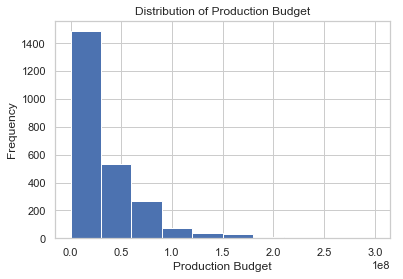

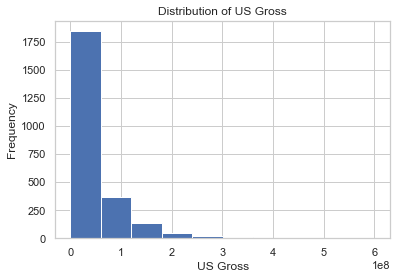

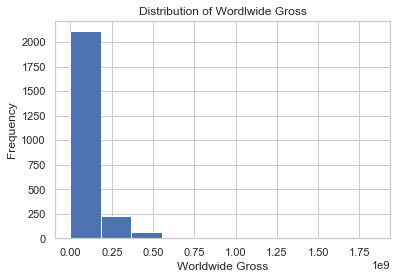

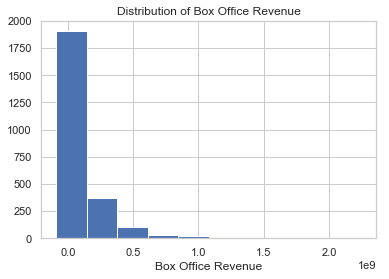

In [10]:
# Lets Visulaize the Box office Reevnue related variables and their distributions
# Production Budget
plt.hist(movies_sub['Production Budget'])
plt.title("Distribution of Production Budget")
plt.xlabel("Production Budget")
plt.ylabel('Frequency')
plt.show()

# US Gross
plt.hist(movies_sub['US Gross'])
plt.title("Distribution of US Gross")
plt.xlabel("US Gross")
plt.ylabel('Frequency')
plt.show()

# Worldwide Gross
plt.hist(movies_sub['Worldwide Gross'])
plt.title("Distribution of Wordlwide Gross")
plt.xlabel("Worldwide Gross")
plt.ylabel('Frequency')
plt.show()

# Box office Revenue
plt.hist(movies_sub['Box Office Revenue'])
plt.title("Distribution of Box Office Revenue")
plt.xlabel("Box Office Revenue")
plt.show()

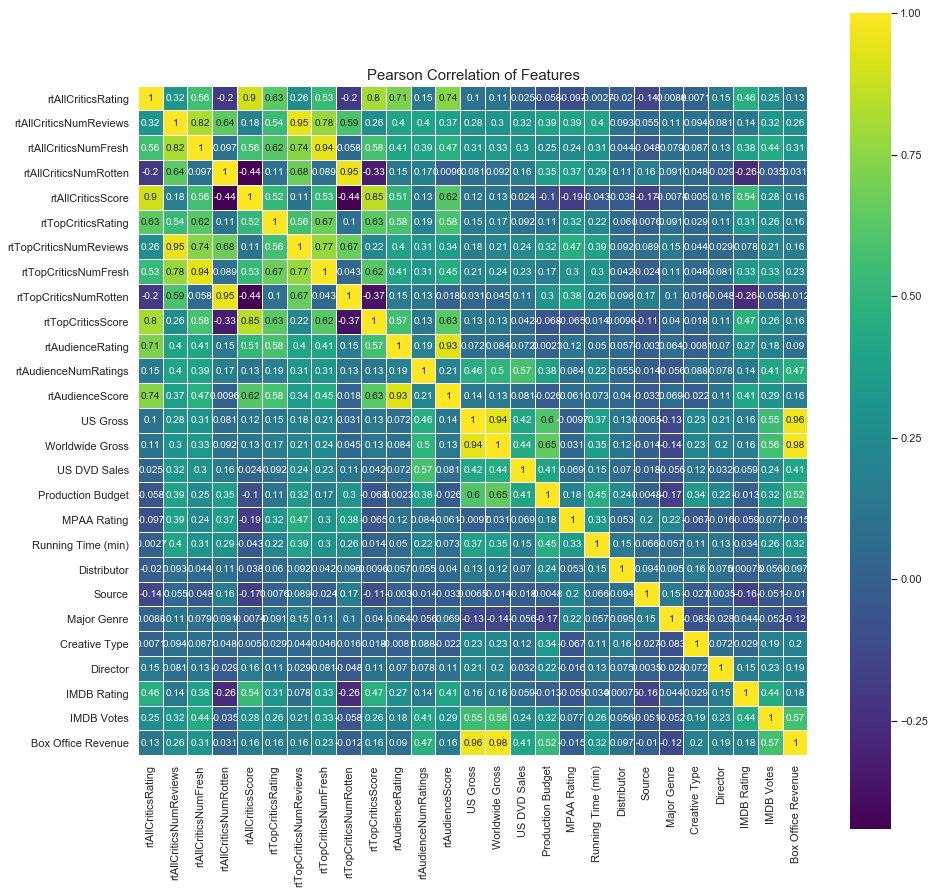

In [11]:
# Create a heatap to visualize the correlation between various features in the dataset
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', size=15)
sns.heatmap(movies_sub.iloc[:,5:].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
plt.show()

From the above Pearson Correlation heatmap, we see that Product Budget, US Gross and Worldwide Gross have high corrlation with Box Office Revenue which makes sense. We also see high correlation between box office revenue and US DVD Sales (0.41), Number of Ratings by Audience (0.47 - higher the number of people provide the rating higher the number of people who purchased a ticket to watch the movie), IMDB Votes (0.57), Running time (0.32), All Critics number of fresh review (0.31), All Critics number of reviews (0.26) and Top Critics Number of Fresh (0.23).

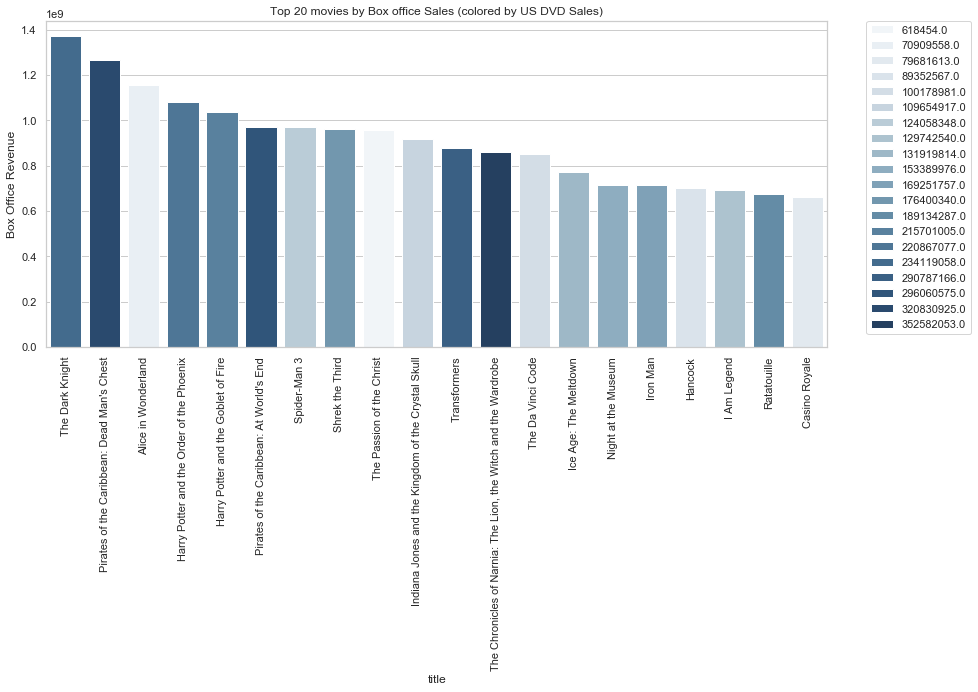

,title,Box Office Revenue,US DVD Sales
2374,The Dark Knight,1.370691e+09,234119058.0
1469,Pirates of the Caribbean: Dead Man's Chest,1.263976e+09,320830925.0
265,Alice in Wonderland,1.157482e+09,70909558.0
2303,Harry Potter and the Order of the Phoenix,1.080474e+09,220867077.0
2097,Harry Potter and the Goblet of Fire,1.036026e+09,215701005.0
1206,Pirates of the Caribbean: At World's End,9.704169e+08,296060575.0
2283,Spider-Man 3,9.694019e+08,124058348.0
2289,Shrek the Third,9.616781e+08,176400340.0
1818,The Passion of the Christ,9.576824e+08,618454.0
2079,Indiana Jones and the Kingdom of the Crystal S...,9.185820e+08,109654917.0


In [12]:
# Evaluate association of Box office revenue with US DVD Sales
movies_sub.sort_values(by='Box Office Revenue',ascending=False,inplace=True)
movie_sub_clean = movies_sub.loc[movies_sub['US DVD Sales'] != -1]
top_20_movies = movie_sub_clean.head(20)

# Visualize the top 20 movies (highest Box Office Revenue)
plt.figure(figsize=(14,6))
sns.barplot(top_20_movies['title'],top_20_movies['Box Office Revenue'],hue=top_20_movies['US DVD Sales'],
            saturation=.5,palette="Blues",dodge=False)
plt.xticks(rotation=90)
plt.title('Top 20 movies by Box office Sales (colored by US DVD Sales)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.001)
plt.show()

# Print the results plotted above
top_20_movies[['title','Box Office Revenue','US DVD Sales']]

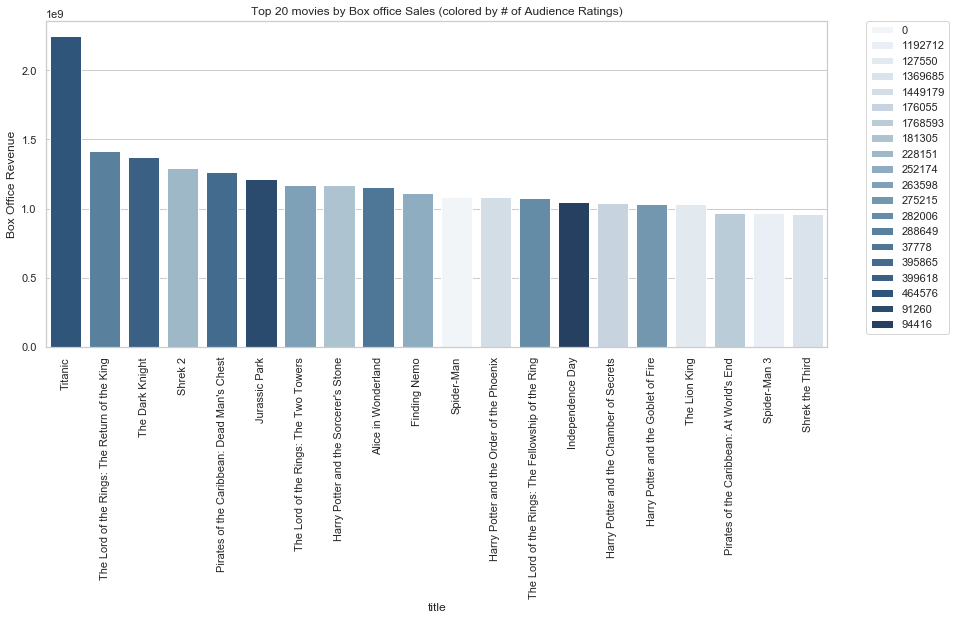

,title,Box Office Revenue,rtAudienceNumRatings
481,Titanic,2.243668e+09,464576
625,The Lord of the Rings: The Return of the King,1.416055e+09,288649
2374,The Dark Knight,1.370691e+09,399618
1859,Shrek 2,1.291065e+09,228151
1469,Pirates of the Caribbean: Dead Man's Chest,1.263976e+09,395865
136,Jurassic Park,1.217136e+09,91260
1590,The Lord of the Rings: The Two Towers,1.174069e+09,263598
1355,Harry Potter and the Sorcerer's Stone,1.169016e+09,181305
265,Alice in Wonderland,1.157482e+09,37778
1677,Finding Nemo,1.113609e+09,252174


In [13]:
# Evaluate association of Box office revenue with Number of Audience Ratings
movies_sub.sort_values(by='Box Office Revenue',ascending=False,inplace=True)
movie_sub_clean = movies_sub.loc[movies_sub['rtAudienceNumRatings'] != -1]
top_20_movies = movie_sub_clean.head(20)

# Visualize the top 20 movies (highest Box Office Revenue)
plt.figure(figsize=(14,6))
sns.barplot(top_20_movies['title'],top_20_movies['Box Office Revenue'],hue=top_20_movies['rtAudienceNumRatings'],
            saturation=.5,palette="Blues",dodge=False)
plt.xticks(rotation=90)
plt.title('Top 20 movies by Box office Sales (colored by # of Audience Ratings)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.001)
plt.show()

# Print the results plotted above
top_20_movies[['title','Box Office Revenue','rtAudienceNumRatings']]

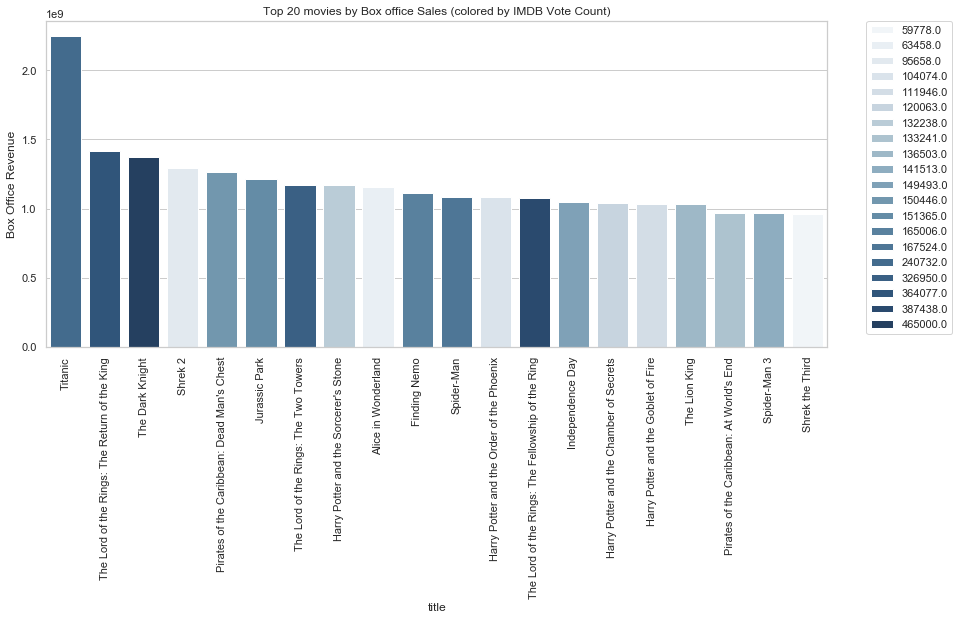

,title,Box Office Revenue,IMDB Votes
481,Titanic,2.243668e+09,240732.0
625,The Lord of the Rings: The Return of the King,1.416055e+09,364077.0
2374,The Dark Knight,1.370691e+09,465000.0
1859,Shrek 2,1.291065e+09,95658.0
1469,Pirates of the Caribbean: Dead Man's Chest,1.263976e+09,150446.0
136,Jurassic Park,1.217136e+09,151365.0
1590,The Lord of the Rings: The Two Towers,1.174069e+09,326950.0
1355,Harry Potter and the Sorcerer's Stone,1.169016e+09,132238.0
265,Alice in Wonderland,1.157482e+09,63458.0
1677,Finding Nemo,1.113609e+09,165006.0


In [14]:
# Evaluate association of Box office revenue with IMDB Votes
movies_sub.sort_values(by='Box Office Revenue',ascending=False,inplace=True)
movie_sub_clean = movies_sub.loc[movies_sub['IMDB Votes'] != -1]
top_20_movies = movie_sub_clean.head(20)

# Visualize the top 20 movies (highest Box Office Revenue)
plt.figure(figsize=(14,6))
sns.barplot(top_20_movies['title'],top_20_movies['Box Office Revenue'],hue=top_20_movies['IMDB Votes'],
            saturation=.5,palette="Blues",dodge=False)
plt.xticks(rotation=90)
plt.title('Top 20 movies by Box office Sales (colored by IMDB Vote Count)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.001)
plt.show()

# Print the results plotted above
top_20_movies[['title','Box Office Revenue','IMDB Votes']]

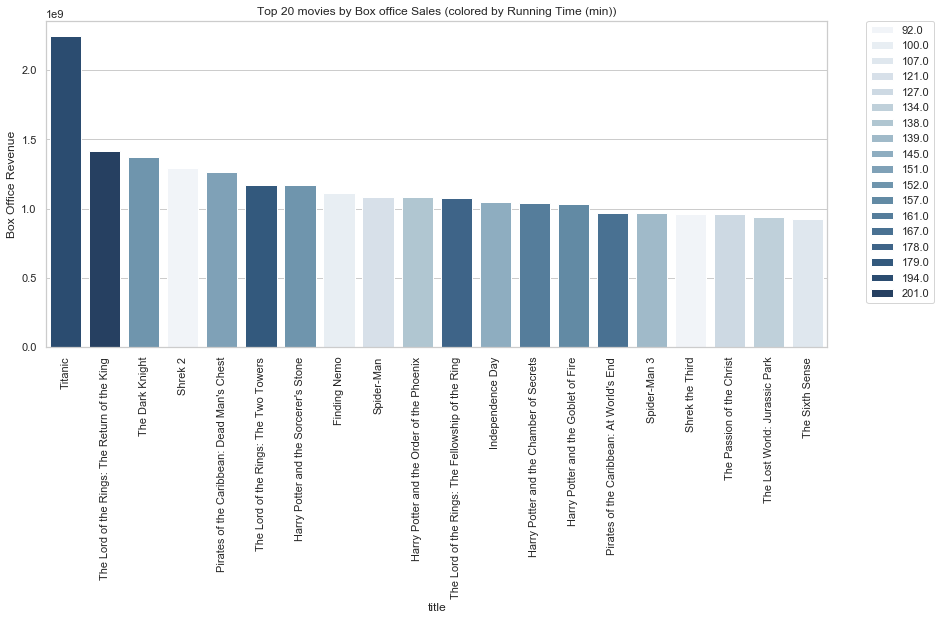

,title,Box Office Revenue,Running Time (min)
481,Titanic,2.243668e+09,194.0
625,The Lord of the Rings: The Return of the King,1.416055e+09,201.0
2374,The Dark Knight,1.370691e+09,152.0
1859,Shrek 2,1.291065e+09,92.0
1469,Pirates of the Caribbean: Dead Man's Chest,1.263976e+09,151.0
1590,The Lord of the Rings: The Two Towers,1.174069e+09,179.0
1355,Harry Potter and the Sorcerer's Stone,1.169016e+09,152.0
1677,Finding Nemo,1.113609e+09,100.0
1451,Spider-Man,1.086415e+09,121.0
2303,Harry Potter and the Order of the Phoenix,1.080474e+09,138.0


In [15]:
# Evaluate association of Box office revenue with Running time
movies_sub.sort_values(by='Box Office Revenue',ascending=False,inplace=True)
movie_sub_clean = movies_sub.loc[movies_sub['Running Time (min)'] != -1]
top_20_movies = movie_sub_clean.head(20)

# Visualize the top 20 movies (highest Box Office Revenue)
plt.figure(figsize=(14,6))
sns.barplot(top_20_movies['title'],top_20_movies['Box Office Revenue'],hue=top_20_movies['Running Time (min)'],
            saturation=.5,palette="Blues",dodge=False)
plt.xticks(rotation=90)
plt.title('Top 20 movies by Box office Sales (colored by Running Time (min))')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.001)
plt.show()

# Print the results plotted above
top_20_movies[['title','Box Office Revenue','Running Time (min)']]

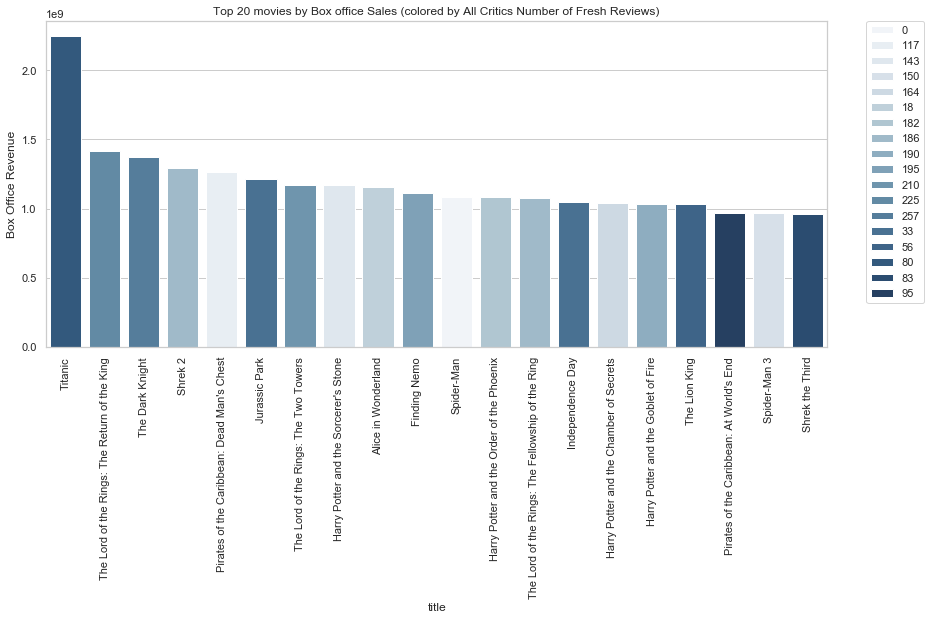

,title,Box Office Revenue,rtAllCriticsNumFresh
481,Titanic,2.243668e+09,80
625,The Lord of the Rings: The Return of the King,1.416055e+09,225
2374,The Dark Knight,1.370691e+09,257
1859,Shrek 2,1.291065e+09,186
1469,Pirates of the Caribbean: Dead Man's Chest,1.263976e+09,117
136,Jurassic Park,1.217136e+09,33
1590,The Lord of the Rings: The Two Towers,1.174069e+09,210
1355,Harry Potter and the Sorcerer's Stone,1.169016e+09,143
265,Alice in Wonderland,1.157482e+09,18
1677,Finding Nemo,1.113609e+09,195


In [16]:
# Evaluate association of Box office revenue with All Critics Number of Fresh Reviews
movies_sub.sort_values(by='Box Office Revenue',ascending=False,inplace=True)
movie_sub_clean = movies_sub.loc[movies_sub['rtAllCriticsNumFresh'] != -1]
top_20_movies = movie_sub_clean.head(20)

# Visualize the top 20 movies (highest Box Office Revenue)
plt.figure(figsize=(14,6))
sns.barplot(top_20_movies['title'],top_20_movies['Box Office Revenue'],hue=top_20_movies['rtAllCriticsNumFresh'],
            saturation=.5,palette="Blues",dodge=False)
plt.xticks(rotation=90)
plt.title('Top 20 movies by Box office Sales (colored by All Critics Number of Fresh Reviews)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.001)
plt.show()

# Print the results plotted above
top_20_movies[['title','Box Office Revenue','rtAllCriticsNumFresh']]

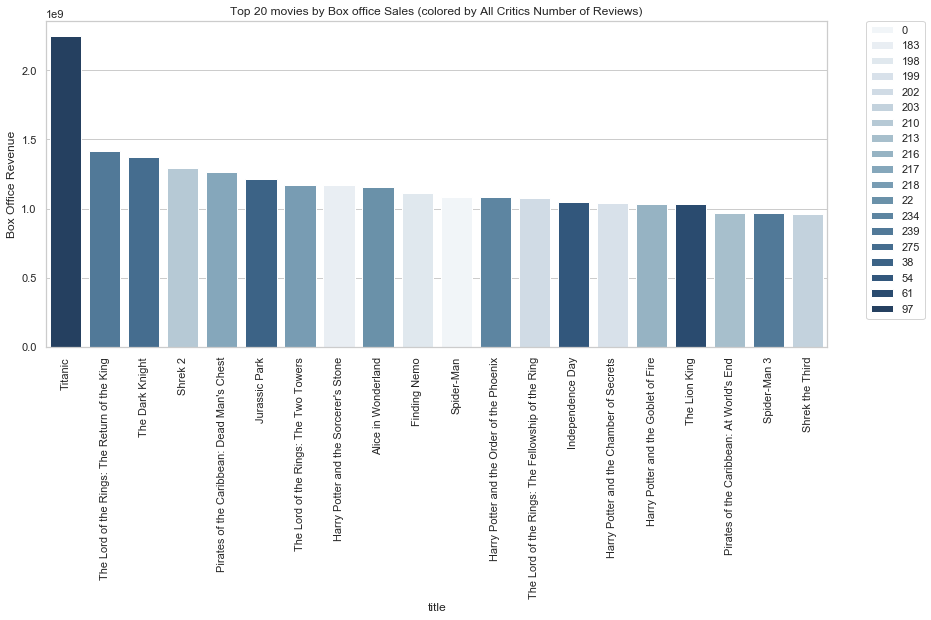

,title,Box Office Revenue,rtAllCriticsNumReviews
481,Titanic,2.243668e+09,97
625,The Lord of the Rings: The Return of the King,1.416055e+09,239
2374,The Dark Knight,1.370691e+09,275
1859,Shrek 2,1.291065e+09,210
1469,Pirates of the Caribbean: Dead Man's Chest,1.263976e+09,217
136,Jurassic Park,1.217136e+09,38
1590,The Lord of the Rings: The Two Towers,1.174069e+09,218
1355,Harry Potter and the Sorcerer's Stone,1.169016e+09,183
265,Alice in Wonderland,1.157482e+09,22
1677,Finding Nemo,1.113609e+09,198


In [17]:
# Evaluate association of Box office revenue with All Critics Number of Reviews
movies_sub.sort_values(by='Box Office Revenue',ascending=False,inplace=True)
movie_sub_clean = movies_sub.loc[movies_sub['rtAllCriticsNumReviews'] != -1]
top_20_movies = movie_sub_clean.head(20)

# Visualize the top 20 movies (highest Box Office Revenue)
plt.figure(figsize=(14,6))
sns.barplot(top_20_movies['title'],top_20_movies['Box Office Revenue'],hue=top_20_movies['rtAllCriticsNumReviews'],
            saturation=.5,palette="Blues",dodge=False)
plt.xticks(rotation=90)
plt.title('Top 20 movies by Box office Sales (colored by All Critics Number of Reviews)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.001)
plt.show()

# Print the results plotted above
top_20_movies[['title','Box Office Revenue','rtAllCriticsNumReviews']]

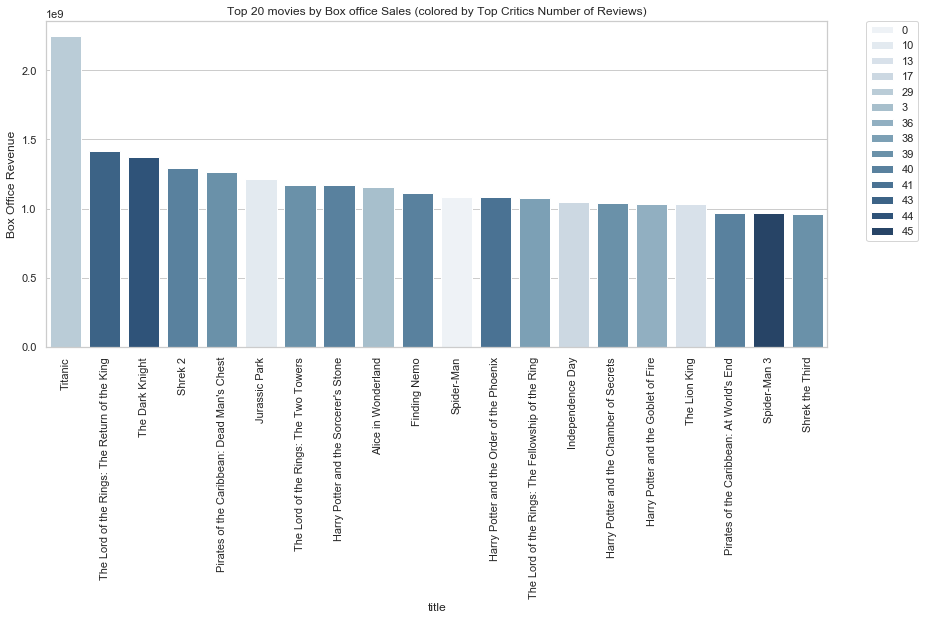

,title,Box Office Revenue,rtTopCriticsNumReviews
481,Titanic,2.243668e+09,29
625,The Lord of the Rings: The Return of the King,1.416055e+09,43
2374,The Dark Knight,1.370691e+09,44
1859,Shrek 2,1.291065e+09,40
1469,Pirates of the Caribbean: Dead Man's Chest,1.263976e+09,39
136,Jurassic Park,1.217136e+09,10
1590,The Lord of the Rings: The Two Towers,1.174069e+09,39
1355,Harry Potter and the Sorcerer's Stone,1.169016e+09,40
265,Alice in Wonderland,1.157482e+09,3
1677,Finding Nemo,1.113609e+09,40


In [18]:
# Evaluate association of Box office revenue with Top Critics Number of Reviews
movies_sub.sort_values(by='Box Office Revenue',ascending=False,inplace=True)
movie_sub_clean = movies_sub.loc[movies_sub['rtTopCriticsNumReviews'] != -1]
top_20_movies = movie_sub_clean.head(20)

# Visualize the top 20 movies (highest Box Office Revenue)
plt.figure(figsize=(14,6))
sns.barplot(top_20_movies['title'],top_20_movies['Box Office Revenue'],hue=top_20_movies['rtTopCriticsNumReviews'],
            saturation=.5,palette="Blues",dodge=False)
plt.xticks(rotation=90)
plt.title('Top 20 movies by Box office Sales (colored by Top Critics Number of Reviews)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.001)
plt.show()

# Print the results plotted above
top_20_movies[['title','Box Office Revenue','rtTopCriticsNumReviews']]

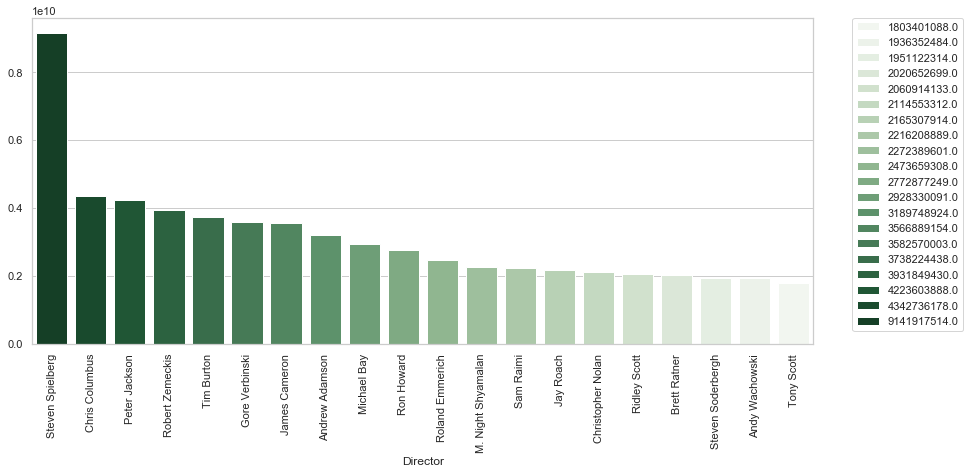

Director
Steven Spielberg      9.141918e+09
Chris Columbus        4.342736e+09
Peter Jackson         4.223604e+09
Robert Zemeckis       3.931849e+09
Tim Burton            3.738224e+09
Gore Verbinski        3.582570e+09
James Cameron         3.566889e+09
Andrew Adamson        3.189749e+09
Michael Bay           2.928330e+09
Ron Howard            2.772877e+09
Roland Emmerich       2.473659e+09
M. Night Shyamalan    2.272390e+09
Sam Raimi             2.216209e+09
Jay Roach             2.165308e+09
Christopher Nolan     2.114553e+09
Ridley Scott          2.060914e+09
Brett Ratner          2.020653e+09
Steven Soderbergh     1.951122e+09
Andy Wachowski        1.936352e+09
Tony Scott            1.803401e+09
Name: Box Office Revenue, dtype: float64


In [19]:
movies_sub = movies[(movies['US Gross'] != 'Unknown') & (movies['Worldwide Gross'] != 'Unknown')]
# Convert to float type
movies_sub['US Gross'] = movies_sub['US Gross'].astype(str).astype(float)
movies_sub['Worldwide Gross'] = movies_sub['Worldwide Gross'].astype(str).astype(float)

# Calculate the Box Office Revenue
movies_sub['Box Office Revenue'] = movies_sub['US Gross'] + movies_sub['Worldwide Gross'] - movies_sub['Production Budget']

# Box office sales with Director
movies_sub_director = movies_sub.groupby(['Director'])['Box Office Revenue'].sum()
movies_sub_director.sort_values(ascending=False,inplace=True)
top_20_movies = movies_sub_director.head(20)

plt.figure(figsize=(14,6))
sns.barplot(top_20_movies.index,top_20_movies.values,hue=top_20_movies.values,
            saturation=.5,palette="Greens",dodge=False)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print(top_20_movies)

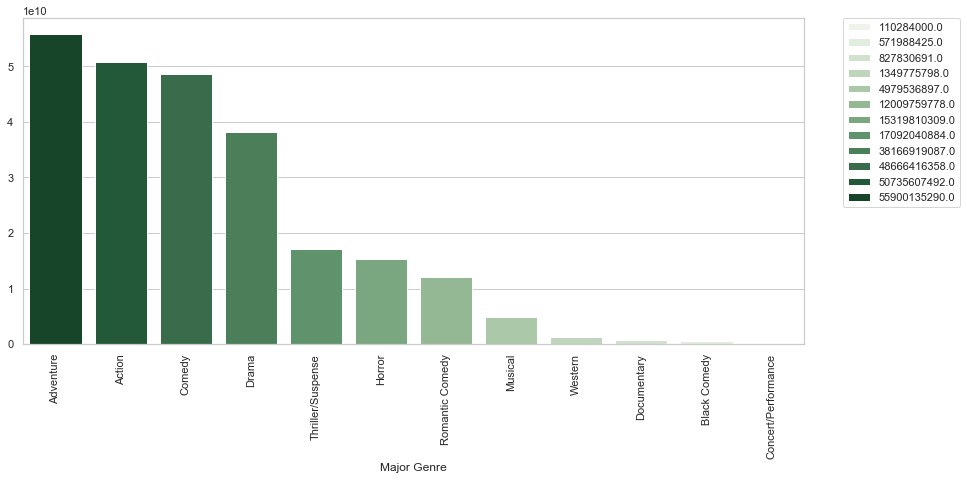

Major Genre
Adventure              5.590014e+10
Action                 5.073561e+10
Comedy                 4.866642e+10
Drama                  3.816692e+10
Thriller/Suspense      1.709204e+10
Horror                 1.531981e+10
Romantic Comedy        1.200976e+10
Musical                4.979537e+09
Western                1.349776e+09
Documentary            8.278307e+08
Black Comedy           5.719884e+08
Concert/Performance    1.102840e+08
Name: Box Office Revenue, dtype: float64


In [20]:
# Box office sales with movie genre
movies_sub_genre = movies_sub.groupby(['Major Genre'])['Box Office Revenue'].sum()
movies_sub_genre.sort_values(ascending=False,inplace=True)
top_20_movies = movies_sub_genre

plt.figure(figsize=(14,6))
sns.barplot(top_20_movies.index,top_20_movies.values,hue=top_20_movies.values,
            saturation=.5,palette="Greens",dodge=False)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print(top_20_movies)

Step 3. Discussion:

From the above analysis, we can draw following observations:
* We see high correlation of Box office Sales with following features: US DVD Sales (0.41), Number of Ratings by Audience (0.47), IMDB Votes (0.57), Running Time (mins)(0.32), All Critics Number of Fresh Reviews (0.31), All Critics Number of Reviews (0.26) and Top Critics Number of Fresh Reviews (0.23). Seeing higher association for these variables makes sense as they in some way or the other affect the count of people who going to watch the movie in the theatres. For instance, Number of Ratings by Audience is higher that means more people actually went to the threatres to watch this movie hence leading to higher box office sales likewise, if US DVD sales were higher that means the movie was so popular among people that they decsed to buy DVDs which indirectly could mean that higher number of people watched the movie in threatres.
* In general, we see higher DVD Sales for movies with higher Box office Sales with few exceptions such as Alice in Wonderland, The Passion of Christ, Casino Royale etc. where we do see that even though the DVD Sales is low, we still see a higher Box office revenue. However, such instaces are few in the top 20 movies according to revenue.
* Looks like number of Audience ratings definitely associates positively with revenue at box office except in cases such as Spider Man, The Lion king. However, the Top movies from revenue perspective still have higher Audience rating counts.
* Higher IMDB Votes would mean that higher numner of people atched the movie and hence it has positive association with the box office Sales except in few cases such Shrek 2, Alice in wonderland, Harry potter and the Order of the Phoenix which are only handful in the top 20 movies.
* Running time also shows that with higher running time, we have higher box office sales except in Shrek 2, Finding Nemo and Shrek the Third amng the top 20 movies.
* All Critics Number of Fresh and total number of Reviews show positive association however in the Top Critics Number of Reviews, we see that the highest Box Office sale is for 'Titanic' but the number of top critics revies is comparatively low (29).
* We see that Steven Spielberg movies have in genral very high Box office Sales followed by Chris Columnbus and Peter Jackson.
* Adventure, Action, Comedy and Drama are the top four categories which leads to higher box office sale numbers with Concert/Performance, Black comedy and Documentary showing very low box office revenues.

### 1.2. Consistency between movie ratings

Next, we will compare movie ratings given by critics versus audience on the Rotten tomatoes.

* Do users agree with critics in terms of movie ratings on the Rotten Tomatoes? When they do and when they don't?

Step 1. Your EDA plan:

**1. What does the dataset look like?**<br>
The data-set has around 2449 unique movie reviews with information combined from rottentomatoes, IMDB and The Numbers. From rotten tomatoes website, we have ratings, number of fresh, number of rotten and the score from all the critics, top crtiics and also audience rating, score and number of ratings. We have US Gross, Worldwide Gross, US DVD Sales and Production Budget as some of the numeric variables and also MPAA Rating, IMDB Rating and Votes as some of more qualitative variables. Assitionally, Running time, Distributor, Source, Major Genre, Creative Type, Director,id, title, year as some of the dimensions.

**2. What variables are you going to examine, and how?** <br>

To compare movie ratings given by crtics versus audience on the Rotten Tomatoes, we can compare following variables:

* **All Critics Ratings Vs Audience Ratings:** We would like to explore the number of instances where the all critic rating and audience rating matches and where it doesn't. We can then do further analysis in terms of what types movies generally have matching ratings and what type doesn't by eveluating them in terms of Director, Source, genre, distributor etc.
* **Top Critics Ratings Vs Audience Ratings:** We would like to explore the number of instances where the top critic rating and audience rating matches and where it doesn't. We can then do further analysis in terms of what types movies generally have matching ratings and what type doesn't by eveluating them in terms of Director, Source, genre, distributor etc.

**3. What hypothese do you have?**<br>
To compare critic ratings with audience rating,I have following three hypothesis:
* The Audience rating would in general not match with critics rating and that is mainly because the number of people giving a rating to a specific movie would be very large as compared to total number of critics in both the categories (top and all). Hence, we would see a lot of deviation in the distribution of ratings given by the audience (as a movie can't serve to satisfy such a large audience as people have different interests and likings) and hence rating would in general we lower as compared to critics ratings. 
* I would assume the rating from the top critics and All critics would in general match as they would look at the mpvie from a similar angle and personal likings and dislikings would in general not come into picture.

**4. Are there any concerns or limitations of your analysis?**<br>
We currently have aggregated data for all the ratings per movie however, it would have been great to see individual ratings provided by audiences and critics so as to plot distribution of these ratings to better understand how the data is distributed. It would give us more insights into reason for similar or different ratings in the two categories.

In [21]:
# Step 2. Your codes for EDA
# All Critics Rating
print('Unique Ratings given by All Critics:')
print(movies['rtAllCriticsRating'].unique())
print('\nAll Critics: Total number of unqiue ratings:',len(movies['rtAllCriticsRating'].unique()))

# Top Critics Rating
print('\nUnique Ratings given by Top Critics:')
print(movies['rtTopCriticsRating'].unique())
print('\nTop Critics: Total number of unqiue ratings:',len(movies['rtTopCriticsRating'].unique()))

# Audience Rating
print('\nUnique Ratings given by Audience:')
print(movies['rtAudienceRating'].unique())
print('\nAudience: Total number of unqiue ratings:',len(movies['rtAudienceRating'].unique()))

Unique Ratings given by All Critics:
['9' '5.6' '7.4' '6.8' '7' '6.7' '4.4' '7.2' '7.9' '3.5' '4.1' '4' '7.7'
 '6.6' '4.3' '6.3' '0' '8.2' '8.1' '9.2' '6' '7.5' '3.8' '6.2' '2.4' '4.9'
 '5.8' '3.6' '6.1' '5.5' '8.7' '4.8' '5.7' '5.2' '7.1' '8' '3.1' '4.7' '5'
 '5.4' '5.1' '3' '2.9' '4.5' '8.3' '8.5' '1.6' '6.4' '3.3' '8.9' '5.9'
 '7.3' '4.6' '3.7' '6.9' '4.2' '7.6' '5.3' '3.9' '\\N' '6.5' '8.4' '8.8'
 '3.2' '3.4' '7.8' '8.6' '2.7' '2.2' '2.5' '2.8' '1.9' '2.3' '2.6' '1.7'
 '1.4' '9.4' '1.8']

All Critics: Total number of unqiue ratings: 78

Unique Ratings given by Top Critics:
['8.5' '5.8' '7.2' '6.2' '6.1' '4.7' '6.3' '8.1' '2.9' '0' '4.5' '8.4'
 '7.4' '4.6' '8.2' '7.9' '7.6' '6.4' '3.9' '6.7' '8.6' '6.6' '6.9' '3.4'
 '4.9' '3.1' '4.3' '5.5' '7' '5.1' '7.7' '5.4' '5.3' '5' '7.8' '3.7' '3.2'
 '5.9' '8' '6.5' '3.6' '9.3' '4.8' '4.2' '3.8' '4' '7.1' '6.8' '7.3' '3.5'
 '8.3' '5.7' '\\N' '4.1' '3' '8.8' '4.4' '3.3' '5.2' '6' '2.6' '8.7' '7.5'
 '9.2' '9.4' '5.6' '2.8' '1.7' '2.5' '2.7' '8.9

In [22]:
# Let's remove the rows where we do not have rating values from Rotten tomatoes
df_final = movies.loc[movies['rtAllCriticsRating'] != '\\N']
df_final.drop_duplicates(inplace=True)
len(df_final)

2430

In [23]:
# Let's look the key variables to evaluate
df_final[['title','rtAllCriticsNumReviews','rtAllCriticsRating','rtTopCriticsNumReviews','rtTopCriticsRating','rtAudienceRating','rtAudienceNumRatings']].head()

,title,rtAllCriticsNumReviews,rtAllCriticsRating,rtTopCriticsNumReviews,rtTopCriticsRating,rtAudienceRating,rtAudienceNumRatings
0,Toy story,73,9,17,8.5,3.7,102338
1,Jumanji,28,5.6,5,5.8,3.2,44587
2,Sabrina,31,7.4,5,7.2,3.8,12812
3,GoldenEye,41,6.8,11,6.2,3.4,28260
4,The American President,49,7,18,7.2,3.2,8320


All Critics Vs Audience Ratings:

# of cases Ratings match: 138
# of cases ratings do not match: 2292


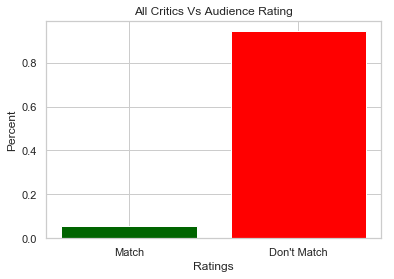

Few Movies where All Critics and Audience Rating matches


,id,title,imdbID,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,...,Production Budget,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,IMDB Rating,IMDB Votes
9,18,Four Rooms,113101,1995,four_rooms,3.5,42,6,36,14,...,4000000.0,R,NaN,Miramax,Original Screenplay,Comedy,Contemporary Fiction,Robert Rodriguez,6.4,34328.0
17,32,Twelve Monkeys,114746,1995,prem-no-public-issue,0,0,0,0,0,...,29000000.0,R,NaN,Universal,Based on Short Film,Drama,Science Fiction,Terry Gilliam,8.1,169858.0
20,39,Clueless,112697,1995,school_of_senses,0,0,0,0,0,...,13700000.0,PG-13,NaN,Paramount Pictures,Based on Book/Short Story,Comedy,Contemporary Fiction,Amy Heckerling,6.7,39055.0
30,61,Eye for an Eye,116260,1996,1101753-eye,0,0,0,0,0,...,20000000.0,R,101.0,Paramount Pictures,Based on Book/Short Story,Drama,Contemporary Fiction,John Schlesinger,5.7,4837.0
31,69,Friday,113118,1995,nothing_funny,0,0,0,0,0,...,3500000.0,R,NaN,New Line,Original Screenplay,Comedy,Contemporary Fiction,F. Gary Gray,7.0,21623.0


In [24]:
# Visualize the above information
# All Critics Vs Audience Ratings
all_match = df_final.loc[df_final['rtAllCriticsRating'] == df_final['rtAudienceRating']]
print('All Critics Vs Audience Ratings:\n')
print('# of cases Ratings match:',len(all_match))
print('# of cases ratings do not match:',len(df_final)-len(all_match))
plt.bar(['Match', "Don't Match"],[len(all_match)/len(df_final),(len(df_final)-len(all_match))/len(df_final)]
       ,color=['darkgreen','red'])
plt.title('All Critics Vs Audience Rating')
plt.ylabel('Percent')
plt.xlabel('Ratings')
plt.show()

print('Few Movies where All Critics and Audience Rating matches')
all_match.head()

Top Critics Vs Audience Ratings:

# of cases Ratings match: 206
# of cases ratings do not match: 2224


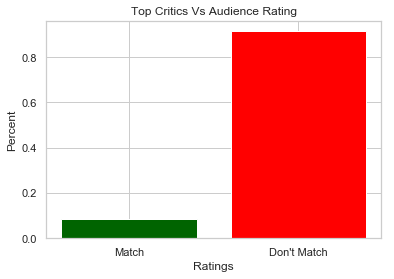

Few Movies where Top Critics and Audience Rating matches


,id,title,imdbID,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,...,Production Budget,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,IMDB Rating,IMDB Votes
17,32,Twelve Monkeys,114746,1995,prem-no-public-issue,0,0,0,0,0,...,29000000.0,R,NaN,Universal,Based on Short Film,Drama,Science Fiction,Terry Gilliam,8.1,169858.0
20,39,Clueless,112697,1995,school_of_senses,0,0,0,0,0,...,13700000.0,PG-13,NaN,Paramount Pictures,Based on Book/Short Story,Comedy,Contemporary Fiction,Amy Heckerling,6.7,39055.0
30,61,Eye for an Eye,116260,1996,1101753-eye,0,0,0,0,0,...,20000000.0,R,101.0,Paramount Pictures,Based on Book/Short Story,Drama,Contemporary Fiction,John Schlesinger,5.7,4837.0
31,69,Friday,113118,1995,nothing_funny,0,0,0,0,0,...,3500000.0,R,NaN,New Line,Original Screenplay,Comedy,Contemporary Fiction,F. Gary Gray,7.0,21623.0
82,255,The Jerky Boys,110189,1995,jerky_boys_the_the_movie,1.6,10,1,9,10,...,4000000.0,R,NaN,Walt Disney Pictures,Original Screenplay,Comedy,Contemporary Fiction,NaN,3.9,1481.0


In [25]:
# Top Critics Vs Audience Ratings
top_match = df_final.loc[df_final['rtTopCriticsRating'] == df_final['rtAudienceRating']]
print('Top Critics Vs Audience Ratings:\n')
print('# of cases Ratings match:',len(top_match))
print('# of cases ratings do not match:',len(df_final)-len(top_match))
plt.bar(['Match', "Don't Match"],[len(top_match)/len(df_final),(len(df_final)-len(top_match))/len(df_final)]
       ,color=['darkgreen','red'])
plt.title('Top Critics Vs Audience Rating')
plt.ylabel('Percent')
plt.xlabel('Ratings')
plt.show()

print('Few Movies where Top Critics and Audience Rating matches')
top_match.head()

Maybe we can give some leeway towards what we consider to be a match when it comes to critics and audience rating and to understand this better let's see if we see numbers above change when we say that audience rating is equal to critics rating when it falls within a specific range of the audience rating. We will use +/-0.5 as the criteria for evaluating the same.

All Critics Vs Audience Ratings:

# of cases Ratings match: 261
# of cases ratings do not match: 2169


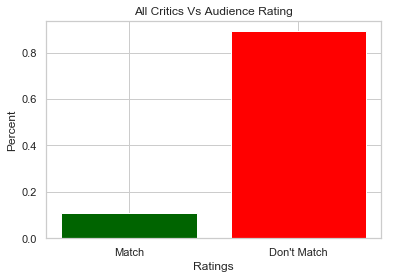

Top Critics Vs Audience Ratings:

# of cases Ratings match: 362
# of cases ratings do not match: 2068


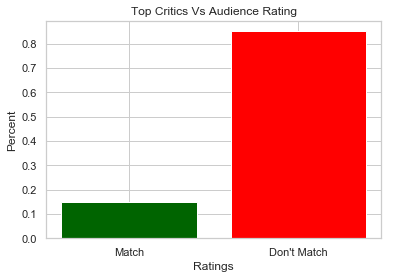

In [26]:
# Visualize the above information
# All Critics Vs Audience Ratings
all_match = df_final.loc[abs(df_final['rtAllCriticsRating'].astype(float) - df_final['rtAudienceRating'].astype(float)) <= 0.5]
print('All Critics Vs Audience Ratings:\n')
print('# of cases Ratings match:',len(all_match))
print('# of cases ratings do not match:',len(df_final)-len(all_match))
plt.bar(['Match', "Don't Match"],[len(all_match)/len(df_final),(len(df_final)-len(all_match))/len(df_final)]
       ,color=['darkgreen','red'])
plt.title('All Critics Vs Audience Rating')
plt.ylabel('Percent')
plt.xlabel('Ratings')
plt.show()

# Top Critics Vs Audience Ratings
top_match = df_final.loc[abs(df_final['rtTopCriticsRating'].astype(float) - df_final['rtAudienceRating'].astype(float)) <= 0.5]
print('Top Critics Vs Audience Ratings:\n')
print('# of cases Ratings match:',len(top_match))
print('# of cases ratings do not match:',len(df_final)-len(top_match))
plt.bar(['Match', "Don't Match"],[len(top_match)/len(df_final),(len(df_final)-len(top_match))/len(df_final)]
       ,color=['darkgreen','red'])
plt.title('Top Critics Vs Audience Rating')
plt.ylabel('Percent')
plt.xlabel('Ratings')
plt.show()

Even with +/-0.5 margin, we see that in general Audience rating doesn't match with Critics ratings. More than 80% percent of times in the current dataset, we see that they do not match. Hence, we can conclude that in general audience do not agree with critics that often. Now let's dig into the cases where they do agree and where they do not.

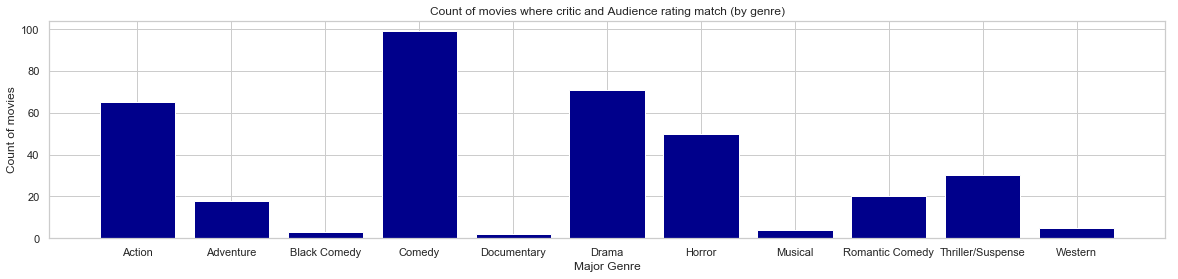

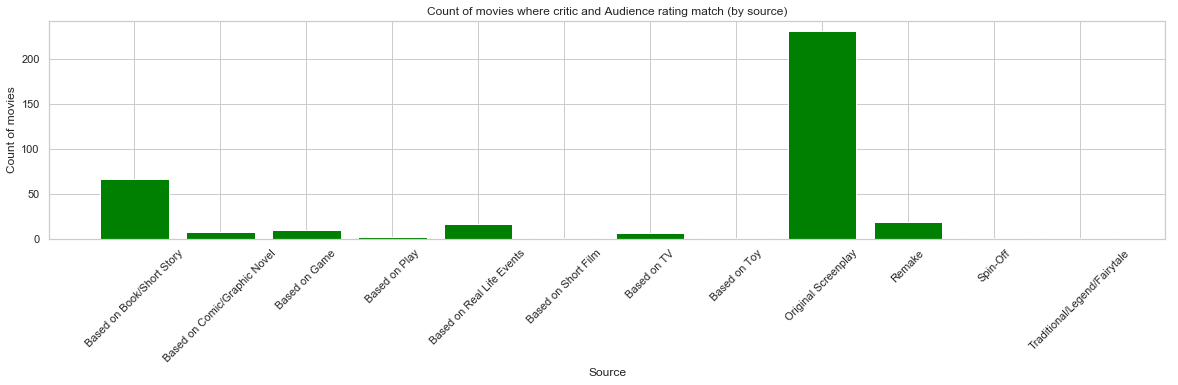

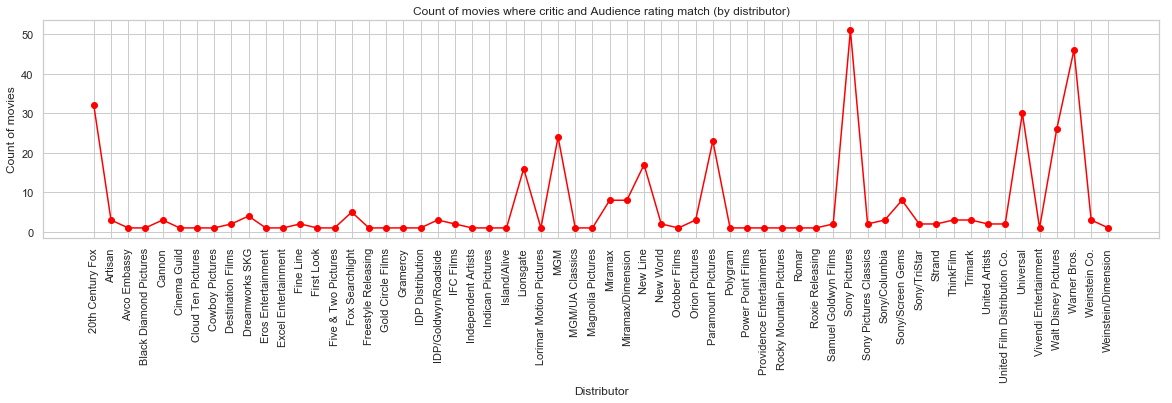

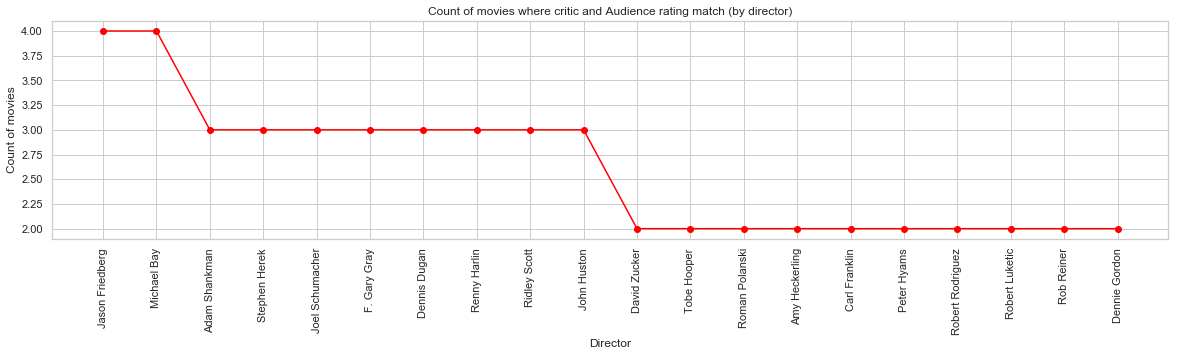

In [27]:
# Where they agree?
#Critics Vs Audience Ratings
df_all_match = df_final.loc[(abs(df_final['rtAllCriticsRating'].astype(float) - df_final['rtAudienceRating'].astype(float)) <= 0.5)
                           | (abs(df_final['rtTopCriticsRating'].astype(float) - df_final['rtAudienceRating'].astype(float)) <= 0.5)]

# By Major Genre
genre_df = df_all_match.groupby(['Major Genre'])['title'].count()
plt.figure(figsize=(20,4))
plt.bar(genre_df.index,genre_df.values,color='DarkBlue')
plt.title('Count of movies where critic and Audience rating match (by genre)')
plt.ylabel('Count of movies')
plt.xlabel('Major Genre')
plt.show()

# By Source
source_df = df_all_match.groupby(['Source'])['title'].count()
plt.figure(figsize=(20,4))
plt.bar(source_df.index,source_df.values,color='Green')
plt.title('Count of movies where critic and Audience rating match (by source)')
plt.ylabel('Count of movies')
plt.xlabel('Source')
plt.xticks(rotation=45)
plt.show()

# By Distributor
dist_df = df_all_match.groupby(['Distributor'])['title'].count()
plt.figure(figsize=(20,4))
plt.plot(dist_df.index,dist_df.values,'-bo',color='red')
plt.title('Count of movies where critic and Audience rating match (by distributor)')
plt.ylabel('Count of movies')
plt.xlabel('Distributor')
plt.xticks(rotation=90)
plt.show()

# By Director
dir_df = df_all_match.groupby(['Director'])['title'].count()
dir_df = dir_df.sort_values(ascending=False).head(20)
plt.figure(figsize=(20,4))
plt.plot(dir_df.index,dir_df.values,'-bo',color='red')
plt.title('Count of movies where critic and Audience rating match (by director)')
plt.ylabel('Count of movies')
plt.xlabel('Director')
plt.xticks(rotation=90)
plt.show()

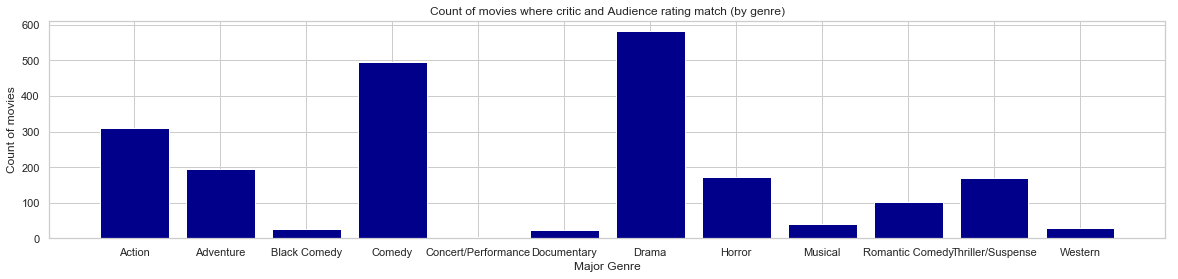

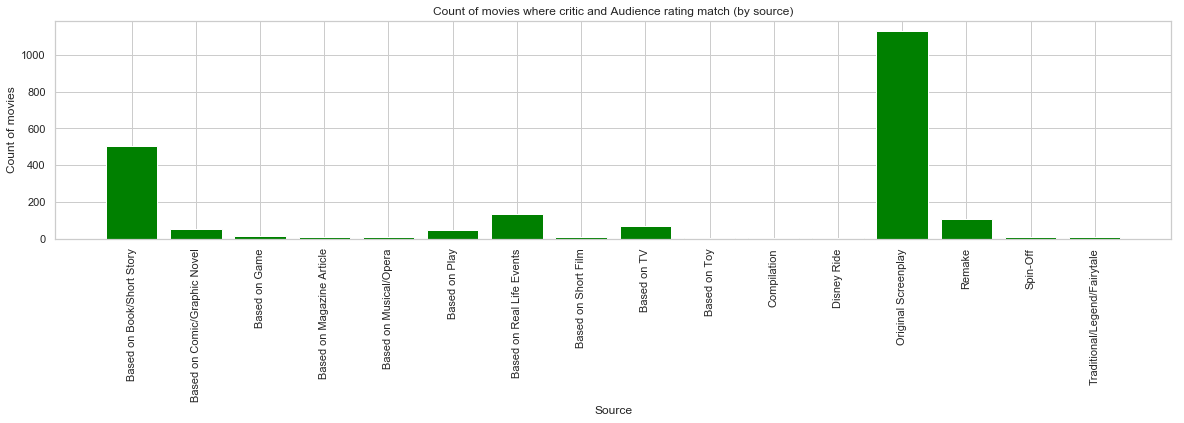

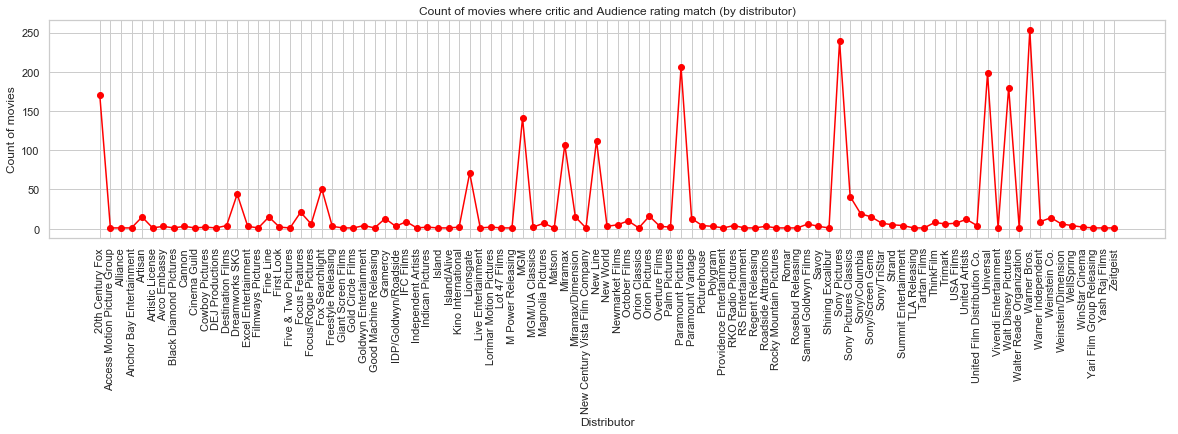

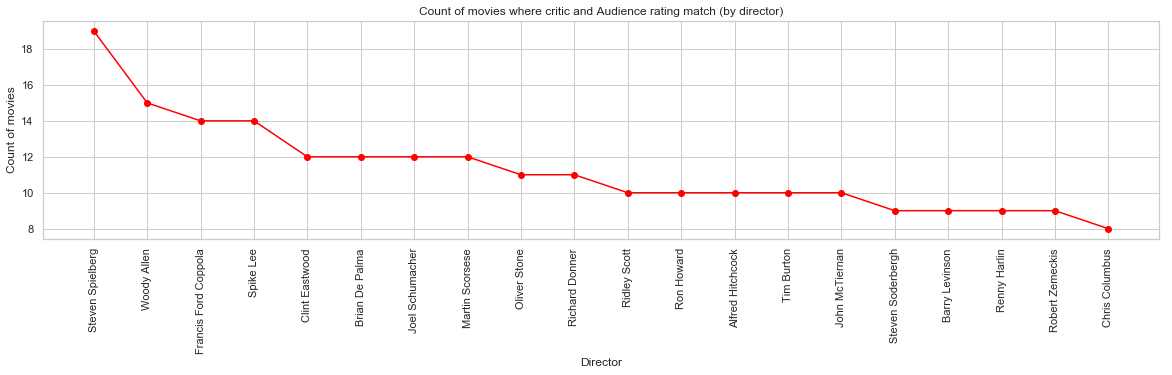

In [28]:
# Where they do not agree?
# All Critics Vs Audience Ratings
df_all_nomatch = df_final.loc[(abs(df_final['rtAllCriticsRating'].astype(float) - df_final['rtAudienceRating'].astype(float)) > 0.5) |
                             abs(df_final['rtTopCriticsRating'].astype(float) - df_final['rtAudienceRating'].astype(float)) > 0.5]


# By Major Genre
genre_df = df_all_nomatch.groupby(['Major Genre'])['title'].count()
plt.figure(figsize=(20,4))
plt.bar(genre_df.index,genre_df.values,color='DarkBlue')
plt.title('Count of movies where critic and Audience rating match (by genre)')
plt.ylabel('Count of movies')
plt.xlabel('Major Genre')
plt.show()

# By Source
source_df = df_all_nomatch.groupby(['Source'])['title'].count()
plt.figure(figsize=(20,4))
plt.bar(source_df.index,source_df.values,color='Green')
plt.title('Count of movies where critic and Audience rating match (by source)')
plt.ylabel('Count of movies')
plt.xlabel('Source')
plt.xticks(rotation=90)
plt.show()

# By Distributor
dist_df = df_all_nomatch.groupby(['Distributor'])['title'].count()
plt.figure(figsize=(20,4))
plt.plot(dist_df.index,dist_df.values,'-bo',color='red')
plt.title('Count of movies where critic and Audience rating match (by distributor)')
plt.ylabel('Count of movies')
plt.xlabel('Distributor')
plt.xticks(rotation=90)
plt.show()

# By Director
dir_df = df_all_nomatch.groupby(['Director'])['title'].count()
dir_df = dir_df.sort_values(ascending=False).head(20)
plt.figure(figsize=(20,4))
plt.plot(dir_df.index,dir_df.values,'-bo',color='red')
plt.title('Count of movies where critic and Audience rating match (by director)')
plt.ylabel('Count of movies')
plt.xlabel('Director')
plt.xticks(rotation=90)
plt.show()

Step 3. Discussion:

From the plots above, we have following observations:

* We can infer that users generally do not agree with critics ratings because the number of instance where the movie ratings match for these two categories are very low i.e., almost more than 80% of times users do not agree with the ratings of the critics. Another patter we observe is that user ratings tend to be uch lower as compare to critic ratings and we can say that it could be due to the fact that number of users who are providing ratings is generally very large as compared to the number of critics and hence the ratings could have larger impact if most of the users are rating low. Additionally, because a we have a larger population in the audience the variance would also be vry high in terms of ratings provided since a single movie can't cater to the likings and interest of such a large population. On contrary, the individual ratings within critics would have larger influence as the total number is low and also critics would look at the movies through a similar lens when evaluating a movie and hence would in general provide similar ratings.

* **MOVIES WHERE RATINGS MATCH**: For movies where the rating match, we see that comedy, drama, action genres have higher counts of the movies where the critics agreed with audiences. 'Based on book/story' and 'Original Screenplay' have higher counts for movies where we see agreement however, we also need to consider that the number of movies in these cateogires could be higher overall in the dataset leading to higher numbers here. We also see that movies by Warner Bros., Sony Picture and Paramount Pictures in general have higher aggreement between critics and audience rating. Lastly we see higher agreement between critics and audience in the provies directed by Jason Friedberg, Micheal Bay and Adam Shankman.

* **MOVIES WHERE RATINGS DO NOT MATCH**: For movies where ratings do not match, we see that Drama tops the list followed by Comedy and then Action. Simialr to where users agreed, we see that users equally do not agree when it comes to original screenplay and based on book/story type of sources for the movies. Distributors also remain the same in terms of movies where we see higher disaggrement (Warner Bros., Sony Picture and Paramount Pictures), it could also be due to the fact that these distributors have higher number of movies overall in our dataset. Lastly, we see disagreement between critics and users when the movies are directed by Steven Spielberg, Woody Allen and Francis Ford Coppola wherein critics are giving higher ratings to these known directors as compared to the audiences.

## Part 2 - Analyzing Movie Reviews

Now let's move on to build a Naive Bayes classifier to predict whether a review is Fresh or Rotten, based on the text of the review. I have imported the dataset for you.

In [29]:
# Import movie reviews data
reviews = pd.read_csv("a3-reviews.csv")
reviews.head()

,critic,fresh,imdb,link,publication,quote,review_date,rtid,title
0,Derek Adams,fresh,114709,http://www.timeout.com/film/reviews/87745/toy-...,Time Out,"So ingenious in concept, design and execution ...",2009-10-04 00:00:00,9559,Toy Story
1,Richard Corliss,fresh,114709,"http://www.time.com/time/magazine/article/0,91...",TIME Magazine,The year's most inventive comedy.,2008-08-31 00:00:00,9559,Toy Story
2,David Ansen,fresh,114709,http://www.newsweek.com/id/104199,Newsweek,A winning animated feature that has something ...,2008-08-18 00:00:00,9559,Toy Story
3,Leonard Klady,fresh,114709,http://www.variety.com/review/VE1117941294.htm...,Variety,The film sports a provocative and appealing st...,2008-06-09 00:00:00,9559,Toy Story
4,Jonathan Rosenbaum,fresh,114709,http://onfilm.chicagoreader.com/movies/capsule...,Chicago Reader,"An entertaining computer-generated, hyperreali...",2008-03-10 00:00:00,9559,Toy Story


In [30]:
# Let's look the data types
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13442 entries, 0 to 13441
Data columns (total 9 columns):
critic         12737 non-null object
fresh          13442 non-null object
imdb           13442 non-null int64
link           13442 non-null object
publication    13442 non-null object
quote          13442 non-null object
review_date    13442 non-null object
rtid           13442 non-null int64
title          13442 non-null object
dtypes: int64(2), object(7)
memory usage: 945.2+ KB


In [31]:
# Explore label categories
reviews['fresh'].value_counts()

fresh     8389
rotten    5030
none        23
Name: fresh, dtype: int64

### 2.1 Text Cleaning and Unigram Representation

Before we get into the text classification, let's spend some time work with the reviews text! 

Are the reviews clean enough to you? As we will use bag-of-words representation here, we want to reduce the sparse representation. In this part, you will first clean the reviews by:

* Ignoring case
* Ignoring punctuation & extra whitespaces
* Removing stopwords

Then, you will tokenize the reviews; in other words, you are going to convert your text fields into "bag of words" vectors.
One thing that may help you in the following problems is the [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) object in Scikit-learn. This function also provides built-in methods to lower cases, remove punctuations, whitespaces and stopwords. Make sure you read the function documentation and review the lab demos to understand how the process goes. Eventually, you will get a bag-of-words array from your reviews data. Name your complete feature set as X and your target (i.e. rotten or fresh labels) as Y.

* X is a (nreview, nwords) array. Each row corresponds to a bag-of-words representation for a single review. This will be the input to your model.
* Y is a nreview-element 1/0 array, encoding whether a review is Fresh (1) or Rotten (0). This is the desired output from your model.

In [32]:
# Import all the required packages
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from collections import Counter, OrderedDict
from sklearn import preprocessing
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut

In [33]:
# Perform generic cleaning by removing urls from the quotes
def customized_cleaning(x):    
    # we want to remove urls
    cleaned_x = re.sub(r'http\S+','',x)
    return cleaned_x

In [34]:
reviews['quote'] = reviews['quote'].apply(customized_cleaning)
# Lets look at some reviews
reviews['quote'].head()

0    So ingenious in concept, design and execution ...
1                    The year's most inventive comedy.
2    A winning animated feature that has something ...
3    The film sports a provocative and appealing st...
4    An entertaining computer-generated, hyperreali...
Name: quote, dtype: object

In [35]:
# Remove none label types
print('Unique list of target labels:',Counter(reviews['fresh'].values))
reviews = reviews.loc[reviews['fresh'] != 'none']
print('Unique list of target labels after removing missing values:',Counter(reviews['fresh'].values))
print('Number of reviews with rating available:',len(reviews))

Unique list of target labels: Counter({'fresh': 8389, 'rotten': 5030, 'none': 23})
Unique list of target labels after removing missing values: Counter({'fresh': 8389, 'rotten': 5030})
Number of reviews with rating available: 13419


In [36]:
#Relabel labels to numeric type
labels = reviews['fresh']
le = preprocessing.LabelEncoder() 
le.fit(labels)
Y = le.transform(labels)
print('Target variable',Y)
print('Length of target variable:',len(Y))

Target variable [0 0 0 ... 0 1 1]
Length of target variable: 13419


### METHOD I: Use CountVectorizer

In this method we use the existing parameters within the countvectorizer method from sklearn to perform cleaning (lowercase, removing stopwords and punctuatons etc.) of the reviews to create bag of words.

In [37]:
#parameters for vectorizer 
ANALYZER = "word" #unit of features are single words rather then phrases of words 
STRIP_ACCENTS = 'unicode'
TOKENIZER = None
NGRAM_RANGE = (1,1) #Range for pharases of words

#MIN_DF = 0.01 # Exclude words that have a frequency less than the threshold
#MAX_DF = 0.8  # Exclude words that have a frequency greater then the threshold 

vectorizer = CountVectorizer(analyzer=ANALYZER,
                             tokenizer=None, # alternatively tokenize_and_stem but it will be slower 
                             stop_words = stopwords.words('english'),
                             strip_accents=STRIP_ACCENTS,
                             lowercase=True,
                             ngram_range=NGRAM_RANGE,
                             token_pattern = r'\b[^\d\W]+\b'
                             #min_df = MIN_DF,
                             #max_df = MAX_DF
                             )

# This creates a bag of words or feature vector
bag_of_words = vectorizer.fit_transform(reviews['quote']) 
#X = bag_of_words.toarray()
# examine the fitted vocabulary
#pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names()).head()

### METHOD II: Use Custom function

In this method, we write custom functions to perform cleaning on the dataset and then use countvectorizer to create bag of words.

#### Tokenization:

Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph.

In [38]:
# word tokenization - breaks text paragraph into words.
from nltk.tokenize import word_tokenize
tokenized_word=reviews['quote'].apply(word_tokenize)
print(tokenized_word.head().values)

[list(['So', 'ingenious', 'in', 'concept', ',', 'design', 'and', 'execution', 'that', 'you', 'could', 'watch', 'it', 'on', 'a', 'postage', 'stamp-sized', 'screen', 'and', 'still', 'be', 'engulfed', 'by', 'its', 'charm', '.'])
 list(['The', 'year', "'s", 'most', 'inventive', 'comedy', '.'])
 list(['A', 'winning', 'animated', 'feature', 'that', 'has', 'something', 'for', 'everyone', 'on', 'the', 'age', 'spectrum', '.'])
 list(['The', 'film', 'sports', 'a', 'provocative', 'and', 'appealing', 'story', 'that', "'s", 'every', 'bit', 'the', 'equal', 'of', 'this', 'technical', 'achievement', '.'])
 list(['An', 'entertaining', 'computer-generated', ',', 'hyperrealist', 'animation', 'feature', '(', '1995', ')', 'that', "'s", 'also', 'in', 'effect', 'a', 'toy', 'catalog', '.'])]


#### Normalization:
Normalization generally refers to a series of related tasks meant to put all text on a level playing field: converting all text to the same case (upper or lower), removing punctuation, converting numbers to their word equivalents, and so on. Normalization puts all words on equal footing, and allows processing to proceed uniformly.

In [39]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    return words

In [40]:
# Call the normalize function to clean the texts
normalized_reviews = tokenized_word.apply(normalize)
print(normalized_reviews.head())

0    [ingenious, concept, design, execution, could,...
1                            [year, inventive, comedy]
2    [winning, animated, feature, something, everyo...
3    [film, sports, provocative, appealing, story, ...
4    [entertaining, computergenerated, hyperrealist...
Name: quote, dtype: object


In [41]:
# Convert the normalized reviews to array of texts
text_str = [" ".join(t) for t in normalized_reviews.values]
x = np.asarray(text_str)

#Use Countvectorizer to fit a model
vectorizer = CountVectorizer()
vectorizer.fit(x)
X = vectorizer.transform(x)

# Bag of Words Representation or feature vector
X = X.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### 2.2 Train-Test Split (5 pts)

Next, randomly split the data into a training set (67%) and a test set (33%).  One function that may be very helpful is [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Read the documentation and our previous lab demos to understand how the function works.

Name the training set as **X_train** and the corresponding labels as **Y_train**; similarly, name the test set as **X_test** and their labels as **Y_test**.

#### METHOD I - Use CountVectorizer

In [42]:
# Your codes here - for train-test split
X_train, X_test, Y_train, Y_test = train_test_split(bag_of_words.toarray(), Y, test_size=0.33, random_state=1)

In [43]:
print('length of train features dataset:',len(X_train))
print('length of train Target label dataset:',len(Y_train))
print('length of test features dataset:',len(X_test))
print('length of test Target label dataset:',len(Y_test))

length of train features dataset: 8990
length of train Target label dataset: 8990
length of test features dataset: 4429
length of test Target label dataset: 4429


#### METHOD II - Use Custom function

In [44]:
# Your codes here - for train-test split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [45]:
print('length of train features dataset:',len(X1_train))
print('length of train Target label dataset:',len(Y1_train))
print('length of test features dataset:',len(X1_test))
print('length of test Target label dataset:',len(Y1_test))

length of train features dataset: 8990
length of train Target label dataset: 8990
length of test features dataset: 4429
length of test Target label dataset: 4429


### 2.3 Extra Credits ($\leq$ 4 pts): Tuning Hyperparameters

We want to use the training set to train a Naive Bayes classifier using the [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

That calling MultinomialNB() allows us to create a default NB model. However, we often need to tune the hyperparameters of the model for a better performance. Remember the technique for hyperparameters tuning we talked about previously? Cross validation!

The two most important hyperparameters are:

 1. The `min_df` keyword in `CountVectorizer`, which will ignore words which appear in fewer than `min_df` fraction of reviews. Words that appear only once or twice can lead to overfitting, since words which occur only a few times might correlate very well with Fresh/Rotten reviews by chance in the training dataset.
 
 2. The [`alpha` keyword](http://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) in the Bayesian classifier is a "smoothing parameter" -- increasing the value decreases the sensitivity to any single feature, and tends to pull prediction probabilities closer to 50%. 

We are going to use cross-validation to tune these hyperparameters. The objective function we want to maximize is the **log-likelihood** of our data (the function provided below).  Fill in the remaining code in the block below, to loop over many values of `alpha` and `min_df` to determine which settings are "best" in the sense of maximizing the cross-validated log-likelihood.

*hint: sklearn has a built-in function, [`sklearn.model_selection.cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), that might save you a lot of time here...*

#### We perform hyperparameter tuning using only the bag of words created using Method I i.e., Use Countvectorizer Method.

In [46]:
"""
Function
--------
log_likelihood

Compute the log likelihood of a dataset according to a bayesian classifier. 
The Log Likelihood is defined by

L = Sum_fresh(logP(fresh)) + Sum_rotten(logP(rotten))

Where Sum_fresh indicates a sum over all fresh reviews, 
and Sum_rotten indicates a sum over rotten reviews
    
Parameters
----------
model : Bayesian classifier
x : (nexample, nfeature) array
    The input data
y : (nexample) integer array
    Whether each review is Fresh
"""

def log_likelihood(fitted_model, x, y):
    prob = fitted_model.predict_log_proba(x)
    #find rotten or fresh in the target
    rotten = y == 0
    fresh = ~rotten
    #the first column of prob indicates the log likelihood of being rotten, while the second ... being fresh
    return prob[rotten, 0].sum() + prob[fresh, 1].sum()

In [47]:
def create_test_train_bag_of_words(value,X):
    #parameters for vectorizer 
    ANALYZER = "word" #unit of features are single words rather then phrases of words 
    STRIP_ACCENTS = 'unicode'
    TOKENIZER = None
    NGRAM_RANGE = (1,1) #Range for pharases of words

    MIN_DF = value # Exclude words that have a frequency less than the threshold
    #MAX_DF = 0.8  # Exclude words that have a frequency greater then the threshold 

    vectorizer = CountVectorizer(analyzer=ANALYZER,
                             tokenizer=None, # alternatively tokenize_and_stem but it will be slower 
                             stop_words = stopwords.words('english'),
                             #strip_accents=STRIP_ACCENTS,
                             #lowercase=True,
                             ngram_range=NGRAM_RANGE,
                             token_pattern = r'\b[^\d\W]+\b',
                             min_df = MIN_DF,
                             #max_df = MAX_DF
                             )

    bag_of_words = vectorizer.fit_transform(X)
    features = vectorizer.get_feature_names()
    
    return (bag_of_words,features)

#Relabel labels to numeric type
labels = reviews['fresh']
le = preprocessing.LabelEncoder() 
le.fit(labels)
Y = le.transform(labels)
print('Target variable',Y)
print('Length of target variable:',len(Y))

Target variable [0 0 0 ... 0 1 1]
Length of target variable: 13419


In [48]:
#Now it's your turn to find the "best" value for alpha and min_df among these candidates using cross validation
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

# initialize
best_alpha = None
best_min_df = None
max_loglike = -np.inf

cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
#loo = LeaveOneOut()

for alpha in alphas:
    for min_df in min_dfs:
        #print('alpha:',alpha)
        #print('min_df:',min_df)
        # tokenize the reviews with the current min_df value
        bag_of_words,features = create_test_train_bag_of_words(min_df,reviews['quote'])
        X_train, X_test, Y_train, Y_test = train_test_split(bag_of_words.toarray(), Y, test_size=0.33, random_state=1)
            
        # create a NB model using the current alpha candidate
        fitted_model = MultinomialNB(alpha=alpha)
        
        # run k-fold crossvalidation and specify log_likelihood function to be the scoring method
        curr_loglike = cross_val_score(fitted_model,X_train,Y_train,scoring=log_likelihood, cv=cv).mean()
        
        #print(curr_loglike)
        # compare the current performance to the best performance "so far". If greather than the record, update them!
        if max_loglike < curr_loglike:
            best_alpha = alpha
            best_min_df = min_df
            max_loglike = curr_loglike


# Finally, report the "best" value for alpha and min_df
print('Best alpha value:',best_alpha)
print('Best min_df parameter value:',best_min_df)

Best alpha value: 5
Best min_df parameter value: 0.001


### 2.4 Rotten or Fresh? Reviews Classification using Naive Bayes
Now let's train a Naive Bayes classifier!
* If you have completed the Part 2.3, use the hyperparameters that you chose from cross validation.
* If you haven't tuned the model, you may start with a default NB model and perhaps apply your instinct and wisdom to decide the hyperparameters.

Report the accuracy of this model on both the training (67%) and test data (33%).  What do you observe?  Interpret these results!

#### Method I - Use Countvectorizer

In [50]:
# Your codes here - for NB model training
bag_of_words,features = create_test_train_bag_of_words(0.001,reviews['quote'])
X_train, X_test, Y_train, Y_test = train_test_split(bag_of_words.toarray(), Y, test_size=0.33, random_state=1)

print('Dimensions of train and test sets:')
print(X_test.shape,Y_train.shape)
print(X_train.shape,Y_test.shape)

# call the fitted model fitted_model, for future reference:
fitted_model = MultinomialNB(alpha=5)
fitted_model.fit(X_train, Y_train)
print ('\n\nModel Accuracy:',fitted_model.score(X_test, Y_test))

Dimensions of train and test sets:
(4429, 2039) (8990,)
(8990, 2039) (4429,)


Model Accuracy: 0.7315421088281779


#### METHOD II - Use Custom Functions

In [52]:
vectorizer = CountVectorizer(min_df=0.001)
vectorizer.fit(x)
X = vectorizer.transform(x)
X = X.toarray()
# Bag of Words Representation
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.33, random_state=1)

print('Dimensions of train and test sets:')
print(X1_test.shape,Y1_train.shape)
print(X1_train.shape,Y1_test.shape)

# call the fitted model fitted_model, for future reference:
fitted_model = MultinomialNB(alpha=5)
fitted_model.fit(X1_train, Y1_train)
print ('\n\nModel Accuracy:',fitted_model.score(X1_test, Y1_test))

Dimensions of train and test sets:
(4429, 1963) (8990,)
(8990, 1963) (4429,)


Model Accuracy: 0.7356062316550012


Discussion:

**METHOD I - Use Counvectorizer Method:**
With this approach and by leveraging the best values estimated for alpha and min_df, we get model accuracy of 73.15% . We see a large number of features created using this method. Maybe use of lemmetizng or stemming could help improve this performance more.

**METHOD II - Use of Custom Functions:**
With this approach, we get a model accuracy of 73.56% . This is slightly higher than the accuracy we get from using parameters within the countvectorizer to perform text normalization (converting them to lowercase, removing stop words and punctuations). 

### 2.5 Adding Text Normalization
Previously, we cleaned the reviews by ignoring cases, removing stopwords, extra whitespaces and punctuations. Now, let's also try to reduce words to their stems. Use the PorterStemmer algorithm to perform word stemming on movie review strings. The NLTK package has an implementation of this algorithm. Then, extract bag-of-words features based on the stemmed data and conduct machine learning experiments again as you did from 2.2 to 2.4. Compare the performance of this NB model with the performance in 2.4.

#### We use Method - II i.e., use of custom functions, to see the effect of stemming on the accuracy of naive bayes classification model.

In [53]:
# Your codes here - for incorporating stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [54]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = PorterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

In [55]:
normalized_reviews = normalized_reviews.apply(stem_words)

In [56]:
### Feature extraction using Bag of Words
text_str = [" ".join(t) for t in normalized_reviews.values]

x = np.asarray(text_str)
vectorizer = CountVectorizer(min_df=0.001,
                             token_pattern = r'\b[^\d\W]+\b')
vectorizer.fit(x)
X = vectorizer.transform(x)
X = X.toarray()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

print(X_test.shape,Y_train.shape)
print(X_train.shape,Y_test.shape)

fitted_model = MultinomialNB(alpha=5)
clf = fitted_model.fit(X_train, Y_train)
print ('\n\nModel Accuracy:',fitted_model.score(X_test, Y_test))

(4429, 1949) (8990,)
(8990, 1949) (4429,)


Model Accuracy: 0.7421539850982163


Discussion:

We see a little improvement in the model performance with the use of normalization using stemming. The accuracy changed from 73.56% to 74.21% which is about 1% increase overall. Since stemming does help us in extracting the roots of the words and removes redundant features from the feature vector thereby improving model prediction accuracy.

### 2.6 Interpretation
What words best predict a fresh or rotten review?  Using your classifier and the `vectorizer.get_feature_names` method, determine which words best predict a positive or negative review. Print the 10 words that best predict a "fresh" review, and the 10 words that best predict a "rotten" review. For each word, what is the model's probability of freshness if the word appears one time?

In [57]:
# Your codes here - for feature analysis
feature_set = pd.DataFrame(X, columns=vectorizer.get_feature_names())
feature_set.head()

,abil,abl,absolut,absorb,abstract,absurd,accept,accomplish,account,achiev,...,wrong,wrote,yarn,ye,year,yet,york,young,youth,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
feature_set['Y'] = Y
feature_set.head()

,abil,abl,absolut,absorb,abstract,absurd,accept,accomplish,account,achiev,...,wrote,yarn,ye,year,yet,york,young,youth,zone,Y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    print('Most important positive class (Fresh) features:\n')
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
    
    print('\nMost important negative class (Rotten) features:\n')        
    coefs_with_fns = sorted(zip(clf.feature_log_prob_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [60]:
text_str = [" ".join(t) for t in normalized_reviews.values]
x = np.asarray(text_str)
vectorizer = CountVectorizer(min_df=0.001,
                             token_pattern = r'\b[^\d\W]+\b')
vectorizer.fit(x)
X = vectorizer.transform(x)
X = X.toarray()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

fitted_model = MultinomialNB(alpha=5)
clf = fitted_model.fit(X_train, Y_train)
show_most_informative_features(vectorizer, clf, n=20)

Most important positive class (Fresh) features:

	-8.9021	absorb         		-4.1908	movi           
	-8.9021	altern         		-4.3674	film           
	-8.9021	angl           		-4.4618	nt             
	-8.9021	associ         		-4.9281	like           
	-8.9021	astonish       		-5.0562	one            
	-8.9021	casual         		-5.2541	make           
	-8.9021	childhood      		-5.3758	charact        
	-8.9021	crisp          		-5.3936	much           
	-8.9021	curti          		-5.3996	seem           
	-8.9021	darkli         		-5.4553	stori          
	-8.9021	deftli         		-5.5144	good           
	-8.9021	demm           		-5.5418	comedi         
	-8.9021	enhanc         		-5.5487	even           
	-8.9021	etern          		-5.6288	time           
	-8.9021	expertli       		-5.7580	work           
	-8.9021	exquisit       		-5.7580	end            
	-8.9021	exuber         		-5.7666	get            
	-8.9021	gem            		-5.7754	plot           
	-8.9021	goodnatur      		-5.7842	enough         
	

## Part 3 - Analyzing Networks

### 3.1. Understanding Classic Centrality Measures

Please describe possible network configurations/local properties that fit each white cell (six in total) except for diagonal cells:

|                  | Low Degree | Low Betweenness | Low Closeness |
|------------------|------------|-----------------|---------------|
| High Degree      |    NA      |                 |               |
| High Betweenness |            |      NA         |               |
| High Closeness   |            |                 |       NA      |

Your response:
* **High Degree, Low Betweenness**: In this type of a network configuration, the Ego's connections are redundant - communication bypasses him/her i.e., all the nodes would have ties or connections with almost all the other nodes (high degree) which would lead to a lower betweenness for each of these nodes. For instance, in a friend's network, nodes are represented by people and the edges are represented by the friendship ties between people then if everyone is friend's with everyone else then the degree would be high and betweenness would be low leading to connections being redundant for each friend as everybody can talk to everybody else.

* **High Closeness, Low Degree**: This mean that key player tied to important/active players in the network meaning someone with higher closeness is tied to some nodes with lesser connections (lower degree).

* **High Degree, Low Closeness**: This network would have nodes which are embedded in cluster which is far from the rest of the network. Hence, for such nodes we will have high degree because of the cluster formation however, due to higher distance from the rest of the network, the closeness for such nodes would be low. This could be a form of selective mixing or homophily in which people with similar liking/age/interests interact with each other (leading to high degree) but there is formation of groups or cluster in the network (leading to lower closeness).

* **High Closeness, Low Betweenness**: This mean that probably multiple paths exist in the network, ego is near to many people in the network however so are many others in the network.

* **High Betweenness, Low Degree**: The ego's few ties are crucial for network flow as the ego has high betweenness, they control the flow of information even through they have lesser number of ties. It may be possible that with removal of these ego's may lead to disconnection of the graph into components if betweenness is very high.

* **High Betweenness, Low Closeness**: This would be a very rare occurence. This would mean that ego monopolizes the ties from a small number of people to many others.

### 3.2. Understanding Nodes, Degree and Density

In this question, we will explore an [organizational chart](https://en.wikipedia.org/wiki/Organizational_chart) that shows the structure of an organization and the relationships and relative ranks of its parts and positions/jobs. The nodes represent positions and the edges represent supervision relationships.

#### 3.2.1. Construct the network and report the size of the network including the number of nodes and edges. 


In [61]:
# This reads the CSV file. Not a network yet.
EdgesAsDF = pd.read_csv('organizational_chart.txt', delimiter='\t')
# This reads the node labels
position_labels = pd.read_csv('organizational_position_names.txt', delimiter='\t',index_col = 'node')

In [62]:
# Take a look at the network dataframe data
print(EdgesAsDF)
print(EdgesAsDF.shape)

    to  from
0    1     2
1    1     3
2    1     4
3    1     5
4    2     6
5    2     7
6    3     8
7    3     9
8    4    10
9    4    11
10   5    12
11   5    13
12   5    14
13   2    15
14   2    16
(15, 2)


In [63]:
# Take a look at the network labels
# you can use .relabel_nodes() method to update node labels after you have constructed the network
# read the doc: https://networkx.github.io/documentation/latest/reference/generated/networkx.relabel.relabel_nodes.html
print(position_labels['position'])

node
1                  President
2        VP Account Services
3       VP Creative Services
4      VP Marketing Services
5     VP Management Services
6         Account Supervisor
7         Account Supervisor
8                   Art/Copy
9                 Production
10                     Media
11                  Research
12                Accounting
13                Purchasing
14                 Personnel
15         Account Executive
16         Account Executive
Name: position, dtype: object


In [64]:
# Now it's your turn to construct the network from the edgelist
# Your codes here
import networkx as nx
G=nx.from_pandas_edgelist(EdgesAsDF, 'to', 'from')

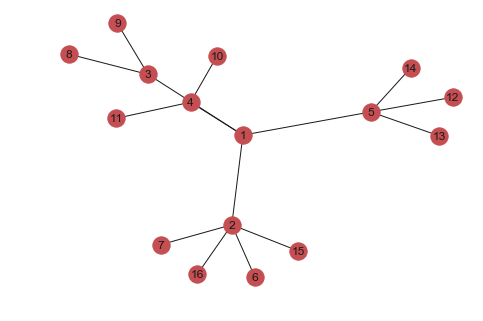

In [65]:
# you might also consider create a visualization to present the network
# with numbers as labels
nx.draw(G,with_labels=True)

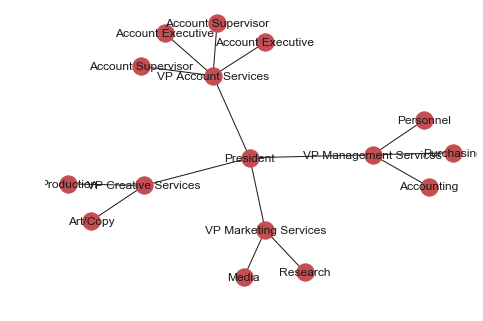

In [66]:
# With mapped labels
# mapping = {1:'President',2:'VP Account Services',3:'VP Creative Services',4:'VP Marketing Services',
#             5:'VP Management Services',6:'Account Supervisor',7:'Account Supervisor',8:'Art/Copy',
#             9:'Production',10:'Media',11:'Research',12:'Accounting',13:'Purchasing',14:'Personnel',
#             15:'Account Executive',16:'Account Executive'}

mapping = dict(zip(range(1,17),position_labels['position'].values))
nx.draw(G,labels=mapping,with_labels=True,arrows=True)

In [67]:
print('Number of nodes in the network:',nx.number_of_nodes(G))
print('Number of edges in the network:',nx.number_of_edges(G))

Number of nodes in the network: 16
Number of edges in the network: 15


#### 3.2.2. Report the degree of each node and plot a histogram to show the degree distribution of this network

Degree sequence [5, 4, 4, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


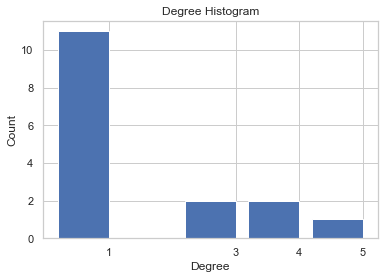


Degree Centrality of each node:


,Name,Nodes,Degree Centrality
0,President,1,4
1,VP Account Services,2,5
2,VP Creative Services,3,3
3,VP Marketing Services,4,3
4,VP Management Services,5,4
5,Account Supervisor,6,1
6,Account Supervisor,7,1
7,Art/Copy,8,1
8,Production,9,1
9,Media,10,1


In [68]:
# Your codes here - report degre and plot degree distribution histogram
import collections
import matplotlib.pyplot as plt

nodes=[]
deg=[]
df = pd.DataFrame()
#print('Degree Centrality for each node:\n',G.degree)

degree = nx.degree(G)
for n, d in degree:
    nodes.append(n)
    deg.append(d)
    
df['Nodes'] = nodes
df['Degree Centrality'] = deg

degree_sequence = sorted([d for n, d in degree], reverse=True)  # degree sequence
print ("Degree sequence", degree_sequence)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
#print(deg)
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.show()

print('\nDegree Centrality of each node:')
df2 = pd.DataFrame(mapping.items(),columns=['Nodes','Name'])
df_final = pd.merge(df, df2,how='inner',on='Nodes',sort=True)
new_order = [2,0,1]
df_final[df_final.columns[new_order]]

#### 3.2.3. Which position is most influential in this network? Compute and compare three types of centrality (i.e. degree, betweenness and closeness centrality).  Discuss your findings.

In [69]:
# Your codes here
df = pd.DataFrame()
nodes = []

# Degree Centrality:
deg = []
bet = []
clo = []

print('Degree Centrality for each node:\n',G.degree)
for n, d in degree:
    nodes.append(n)
    deg.append(d)
    
df['Nodes'] = nodes
df['Degree Centrality'] = deg

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
print('\nBetweenness Centrality for each node:\n',betweenness_centrality)

for key,val in betweenness_centrality.items():
    #nodes.append(key)
    bet.append(val)
    
#df['Nodes'] = nodes
df['Betweenness Centrality'] = bet
    
# Closeness Centrality:
closeness_centrality = nx.closeness_centrality(G)
print('\n Closeness Centrality for each node:\n',closeness_centrality)

for key,val in closeness_centrality.items():
    #nodes.append(key)
    clo.append(val)
    
#df['Nodes'] = nodes
df['Closeness Centrality'] = clo

Degree Centrality for each node:
 [(1, 4), (2, 5), (3, 3), (4, 3), (5, 4), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]

Betweenness Centrality for each node:
 {1: 0.7904761904761906, 2: 0.4761904761904762, 3: 0.2571428571428572, 4: 0.2571428571428572, 5: 0.37142857142857144, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0}

 Closeness Centrality for each node:
 {1: 0.5769230769230769, 2: 0.46875, 3: 0.4166666666666667, 4: 0.4166666666666667, 5: 0.4411764705882353, 6: 0.32608695652173914, 7: 0.32608695652173914, 8: 0.3, 9: 0.3, 10: 0.3, 11: 0.3, 12: 0.3125, 13: 0.3125, 14: 0.3125, 15: 0.32608695652173914, 16: 0.32608695652173914}


In [70]:
mapping = {1:'President',2:'VP Account Services',3:'VP Creative Services',4:'VP Marketing Services',
            5:'VP Management Services',6:'Account Supervisor',7:'Account Supervisor',8:'Art/Copy',
            9:'Production',10:'Media',11:'Research',12:'Accounting',13:'Purchasing',14:'Personnel',
            15:'Account Executive',16:'Account Executive'}

df2 = pd.DataFrame(mapping.items(),columns=['Nodes','Name'])
df_final = pd.merge(df, df2,how='inner',on='Nodes',sort=True)
df_final

new_order = [4,0,1,2,3]
df_final[df_final.columns[new_order]]

,Name,Nodes,Degree Centrality,Betweenness Centrality,Closeness Centrality
0,President,1,4,0.790476,0.576923
1,VP Account Services,2,5,0.476190,0.468750
2,VP Creative Services,3,3,0.257143,0.416667
3,VP Marketing Services,4,3,0.257143,0.416667
4,VP Management Services,5,4,0.371429,0.441176
5,Account Supervisor,6,1,0.000000,0.326087
6,Account Supervisor,7,1,0.000000,0.326087
7,Art/Copy,8,1,0.000000,0.300000
8,Production,9,1,0.000000,0.300000
9,Media,10,1,0.000000,0.300000


Discussion:

Here are few observations based on the centrality measures calculated above:

* **Degree Centrality:** It refers to the total number of edges (incoming and outgoing) associated with each node. In the organizational network above, we see that node 2 (VP Account Services) has the highest degree centrality i.e., 5 followed by node 1 (President) and node 5 (VP Management Services) with degree centrality of 4. Nodes with higher degree would have higher number of connections thereby increasing their influence over the network. Hence, VP Account Services, President and VP Management Services have higher influence over the network.

* **Betweenness Centrality:** Nodes with higher betweennness centrality tend to have higher influence on the flow of information within the network thereby increasing their influence in the network. It is defined as measure of the influence of a vertex over the flow of information between every pair of vertices under the assumption that information primarily flows over the shortest paths between them. Hence, we conclude that node 1 (President) has the highest influence with betweenness value of 0.79 followed by node 2 - VP Account Services (0.47) and nodes 5 - VP Management services (0.37).

* **Closeness Centrality:** Closeness centrality indicates how close a node is to all other nodes in the network. It is calculated as the average of the shortest path length from the node to every other node in the network. Hence, higher the closeness value, higher the influence of the node over the network. We see node 1 (President) has the highest closeness value of 0.57, followed by VP Account services (0.46) and VP Creative and Marketing services (0.41).

Hence, based on the above analysis, we can infer that node 1 (President) has highest influence over the network as it shows comparatively higher values for each of these centrality measures followed by node 2 (VP Account services).

#### 3.2.4.In general, find the density of an arbitrary formal hierarchy (e.g.  an organizational chart) as a function of organizational size. Justify your answer.

#### Density of a graph as a function of size of the graph:

Density of a graph is given by:

- Density (Undirected) = (2 * Number of Edges) / ((Number of nodes) * (Number of Nodes - 1))
- Density (Directed) = (Number of Edges) / ((Number of nodes) * (Number of Nodes - 1))

The density is 0 for a graph without edges and 1 for a complete graph (where actual number of edges is equal to the possible number of edges). The density of multigraphs can be higher than 1.

Hence, for an arbitrary formal hierarchy (e.g., an organizational chart) as the size of the organization increases, the density of the organization hierarchy would reduce if the number of relationships between the employees remains constant. 

Let's plot some networks using the exising organizational hierarchy chart that we have and see how addition of a node (increase in size) affects the density of the network.

Density of the network with 16 nodes: 0.125


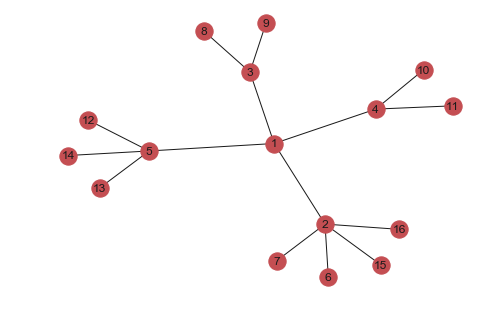

In [71]:
import networkx as nx
G=nx.from_pandas_edgelist(EdgesAsDF, 'from', 'to')
densities=[]
sizes=[]

# Plot the network
nx.draw(G,with_labels=True)
print('Density of the network with 16 nodes:',nx.density(G))
densities.append(nx.density(G))
sizes.append(nx.number_of_nodes(G))

As we see the plot above, the original network has a graph density of 0.125 with the organization size of 16 employees.

Density of the network with 16 nodes: 0.1


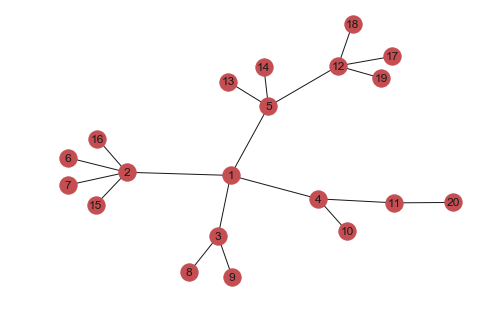

In [72]:
# Add more node to the network (Increasing Size)
G.add_node(17,attr_dict='Staff 2')
G.add_node(18,attr_dict='Staff 2')
G.add_node(19,attr_dict='Staff 2')
G.add_node(20,attr_dict='Staff 2')
G.add_edge(12,17)
G.add_edge(12,18)
G.add_edge(12,19)
G.add_edge(11,20)
# Plot the network
nx.draw(G,with_labels=True)
print('Density of the network with 16 nodes:',nx.density(G))
densities.append(nx.density(G))
sizes.append(nx.number_of_nodes(G))

Density of the network with 16 nodes: 0.06666666666666667


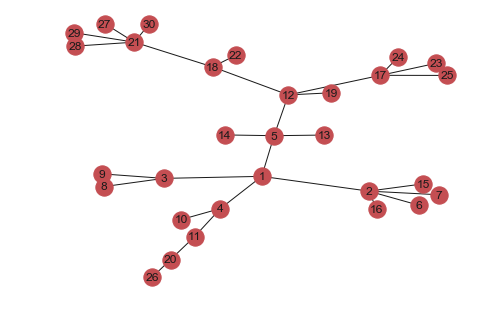

In [73]:
# Add more node to the network (Increasing Size)
G.add_node(21,attr_dict='Staff 1')
G.add_node(22,attr_dict='Staff 1')
G.add_node(23,attr_dict='Staff 1')
G.add_node(24,attr_dict='Staff 1')
G.add_node(25,attr_dict='Staff 1')
G.add_node(26,attr_dict='Staff 1')
G.add_node(27,attr_dict='Staff 1')
G.add_node(28,attr_dict='Staff 1')
G.add_node(29,attr_dict='Staff 1')
G.add_node(30,attr_dict='Staff 1')
G.add_edge(21,18)
G.add_edge(22,18)
G.add_edge(23,17)
G.add_edge(24,17)
G.add_edge(25,17)
G.add_edge(26,20)
G.add_edge(27,21)
G.add_edge(30,21)
G.add_edge(28,21)
G.add_edge(29,21)
# Plot the network
nx.draw(G,with_labels=True)
print('Density of the network with 16 nodes:',nx.density(G))
densities.append(nx.density(G))
sizes.append(nx.number_of_nodes(G))

Density of the network with 16 nodes: 0.05555555555555555


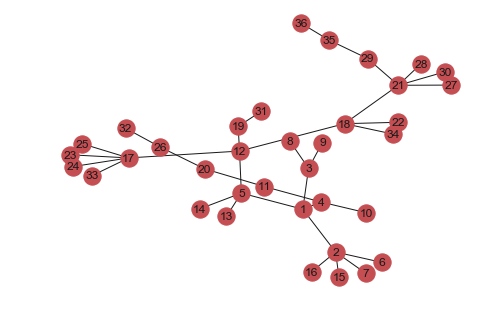

In [74]:
# Add more node to the network (Increasing Size)
G.add_node(31,attr_dict='Staff 1')
G.add_node(32,attr_dict='Staff 1')
G.add_node(33,attr_dict='Staff 1')
G.add_node(34,attr_dict='Staff 1')
G.add_node(35,attr_dict='Staff 1')
G.add_node(36,attr_dict='Staff 1')
G.add_edge(31,19)
G.add_edge(32,26)
G.add_edge(33,17)
G.add_edge(34,18)
G.add_edge(35,29)
G.add_edge(36,35)
# Plot the network
nx.draw(G,with_labels=True)
print('Density of the network with 16 nodes:',nx.density(G))
densities.append(nx.density(G))
sizes.append(nx.number_of_nodes(G))

Density of the network with 16 nodes: 0.05128205128205128


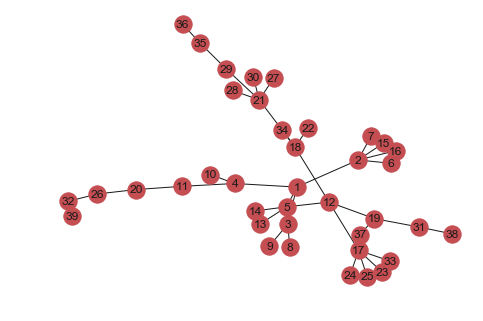

In [75]:
# Add more node to the network (Increasing Size)
G.add_node(37,attr_dict='Staff 1')
G.add_node(38,attr_dict='Staff 1')
G.add_node(39,attr_dict='Staff 1')
G.add_edge(37,19)
G.add_edge(38,31)
G.add_edge(39,32)
# Plot the network
nx.draw(G,with_labels=True)
print('Density of the network with 16 nodes:',nx.density(G))
densities.append(nx.density(G))
sizes.append(nx.number_of_nodes(G))

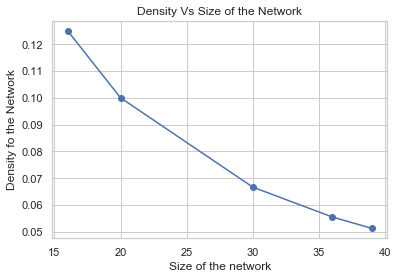

In [76]:
plt.plot(sizes,densities,'-bo')
plt.title('Density Vs Size of the Network')
plt.ylabel('Density fo the Network')
plt.xlabel('Size of the network')
plt.show()

Hence, as we see in the plot above, with the increase in the size of the network, the density of the network decreases and the new employees added to the organization will mostly likely be forming ties with some of the other employees in the network as compared forming ties with all the existing employees. Therefore, we can say that with increase in size, the density decreases. However, one thing to note would be that if there are cyclic formations (loops) in the network due to addition of new employees, it may lead to increase in the density.